<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 6: *Regression***

###**Tenggat Waktu: 12 April 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab6_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 12 April 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.


In [1]:
# Isi dengan data diri Anda
NAMA = "Khansa Mahira"
KELAS = "C"
NPM = "2206819413"
USERNAME_KAGGLE = "khansamahira"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "Gemini",
    "ChatGPT",
    "Perplexity AI",
    "Black Box AI"
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Khansa Mahira dari kelas C dengan NPM 2206819413, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Khansa Mahira)


### Linear Regression

Linear regression adalah metode statistik yang digunakan untuk menemukan hubungan linear antara variabel independen (**X**) dan variabel dependen (**Y**). Tujuan dari linear regression adalah mencari parameter yang menghasilkan garis atau hyperplane terbaik yang meminimalkan selisih antara nilai prediksi dan nilai aktual.


**Persamaan Linear Regression**

Linear regression dapat direpresentasikan dengan persamaan berikut:

$\
y = w_{0} + w_{1}x
$

Dimana:
- $\ w_{0} $ adalah intersep (nilai \( y \) ketika $\ x = 0 $)
- $\ w_{1} $ adalah koefisien regresi (kemiringan garis regresi)
- $\ x $ adalah variabel independen
- $\ y $ adalah variabel dependen

Jika terdapat lebih dari satu variabel independen, persamaannya diperluas menjadi:

$\
y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
$

Ini disebut **multiple linear regression**, di mana terdapat banyak fitur (**X**) yang memengaruhi nilai keluaran (**Y**).

**Cara Menentukan Koefisien ($\ w $ )**

Koefisien dalam linear regression dihitung dengan meminimalkan **fungsi loss**, yaitu perbedaan antara nilai aktual dan prediksi. J(w) di bawah ini adalah contoh fungsi loss linear regression.

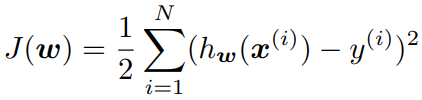

Salah satu metode optimasi yang umum digunakan adalah **gradient descent**, yang bekerja dengan memperbarui nilai \( w \) berdasarkan turunan dari fungsi loss.

**Aplikasi Linear Regression**

Linear regression sering digunakan dalam berbagai bidang seperti:
- Prediksi harga (misalnya harga rumah berdasarkan luas tanah, lokasi, dan fasilitas)
- Analisis tren (misalnya pertumbuhan pendapatan berdasarkan tahun)
- Model ekonomi dan keuangan

Teknik ini menjadi dasar dalam banyak model machine learning dan analisis data.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2X`. Nilai-nilai 1 dan 2, secara berurutan dapat dianggap sebagai nilai w0 dan w1.

Kita akan membuat dataset dengan 1 variabel independen (X) dan 1 target (y) yang mengikuti persamaan:

$y=3+2X$

Dalam hal ini:

$w_0 = 3$ adalah intersep

$w_1 = 2$ adalah koefisien regresi.

Mari kita buat dataset dengan sedikit noise untuk merepresentasikan data nyata, lalu melatih model linear regression.

In [3]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

# Membuat data buatan dengan noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X_train = X.reshape(-1, 1) # Mengubah bentuk array agar sesuai dengan format Scikit-learn
y_train = np.array([5, 7, 10, 11, 13, 15, 17, 20, 21, 23])  # Mengikuti y = 3 + 2X dengan sedikit noise

print('X: ', X_train)
print('y: ', y_train)

X:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
y:  [ 5  7 10 11 13 15 17 20 21 23]


In [4]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [5]:
# Menampilkan koefisien dan intersep dari model
print("Koefisien persamaan linear: ", linear.coef_)  # Harus mendekati 2
print("Intersep persamaan linear: ", linear.intercept_)  # Harus mendekati 3

Koefisien persamaan linear:  [2.]
Intersep persamaan linear:  3.1999999999999975


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

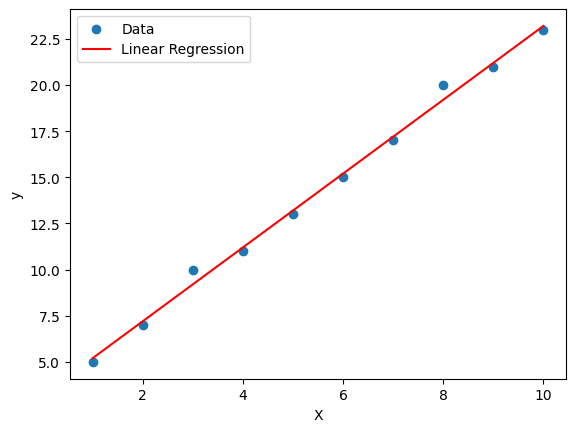

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Coba memprediksi data baru.

In [7]:
# Prediksi dengan Data Baru
X_test = np.array([[2], [5], [8]])
y_test = np.array([7, 13, 19])  # Nilai sebenarnya sesuai dengan y = 3 + 2X

y_predict = linear.predict(X_test)
print("Hasil prediksi:", y_predict)

Hasil prediksi: [ 7.2 13.2 19.2]


Evaluasi performa model

In [8]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9983333333333333


Dengan R-squared sebesar 0.9983, model memiliki akurasi yang sangat tinggi dalam memprediksi hubungan antara X dan y. Nilai R-squared yang mendekati 1 menunjukkan bahwa model dapat menjelaskan 99.83% variabilitas data, sehingga **sangat baik dalam merepresentasikan hubungan linear ini**.

###Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

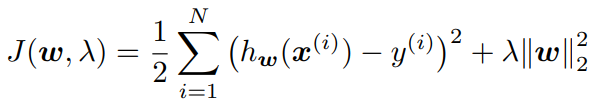

- Lasso Regression

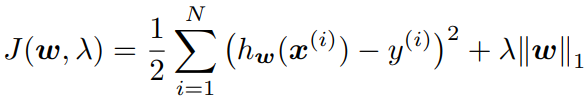

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset yang sebelumnya kita buat.

####Ridge

In [9]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [10]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [1.95266272]
Intersep persamaan regresi ridge: 
 3.4603550295857985


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

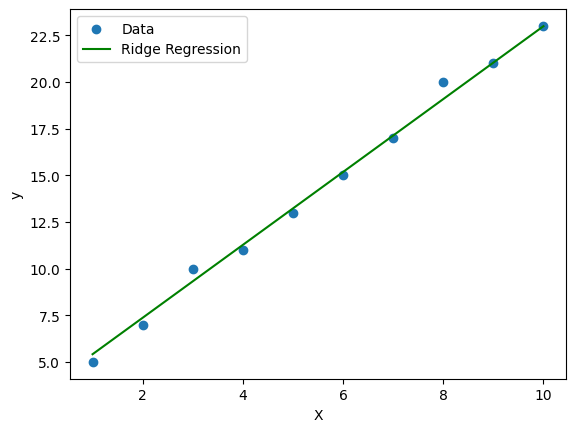

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

####Lasso

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [12]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [13]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.75757576]
Intersep persamaan regresi lasso: 
 4.533333333333333


Berdasarkan persamaan linear pada lasso regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

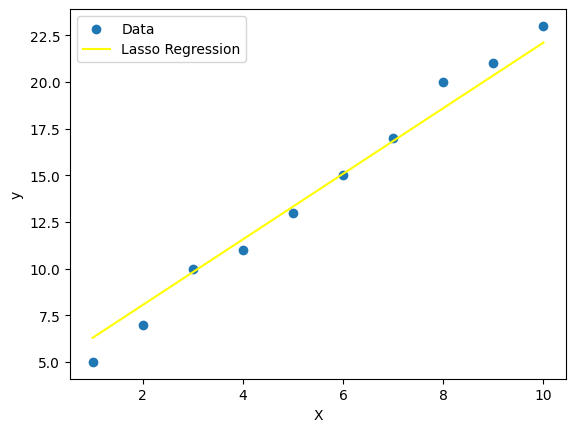

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

####Perbandingan Linear, Ridge, Lasso Regression

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaik kinerja dari model pada konteks data sederhana yang kita bentuk.

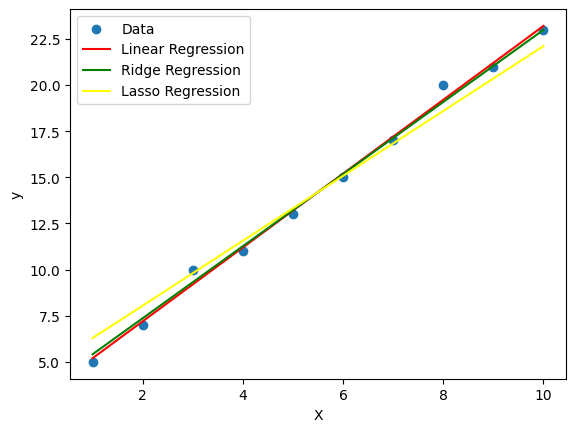

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

###Penjelasan Dataset untuk *Linear Regression, Lasso Regression, dan Ridge Regression*

Dataset ini berisi sembilan pengukuran morfometrik dari 104 ekor possum gunung brushtail yang ditangkap di tujuh lokasi dari Victoria Selatan hingga Queensland tengah.

**Fitur dalam dataset:**  
1. **case**: Nomor unik yang mengidentifikasi setiap possum.  
2. **site**: Lokasi tempat possum ditangkap, dikodekan sebagai angka.  
3. **Pop**: Populasi possum berdasarkan wilayah geografisnya.  
4. **sex**: Jenis kelamin possum (m untuk jantan, f untuk betina).  
5. **age**: Usia possum dalam tahun.  
6. **hdlngth**: Panjang kepala possum dalam milimeter.  
7. **skullw**: Lebar tengkorak possum dalam milimeter.  
8. **totlngth**: Panjang total possum dari kepala hingga ujung ekor dalam milimeter.  
9. **taill**: Panjang ekor possum dalam sentimeter.  
10. **footlgth**: Panjang kaki possum dalam milimeter.  
11. **earconch**: Panjang concha telinga possum dalam milimeter.  
12. **eye**: Lebar mata possum dalam milimeter.  
13. **chest**: Lingkar dada possum dalam sentimeter.  
14. **belly**: Lingkar perut possum dalam sentimeter.  

**Target variabel:**

* **hdlngth**: Panjang kepala possum dalam milimeter.

**Sumber data dan penjelasan:**  
https://www.kaggle.com/datasets/abrambeyer/openintro-possum

In [16]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_possum = pd.read_csv('possum.csv')
df_possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [17]:
# Menampilkan informasi keseluruhan terkait dataset
df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi. Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang setidaknya dilakukan sebagai berikut:

* Handle missing values dan duplikat data
* Melakukan encoding pada data kategorikal
* Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
* Melakukan standarisasi pada dataset. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

##### Missing values

In [18]:
def fill_null(df, column_name, distribution_type):
    """
    Fills null values in a DataFrame column based on the distribution type.

    Args:
        df: pandas DataFrame.
        column_name: Name of the column to fill.
        distribution_type: Distribution type of the column ('normal', 'skewed', or 'categorical').

    Returns:
        pandas DataFrame with filled null values.
    """

    if df[column_name].dtype == 'object':  # If the column is categorical (non-numeric)
        # If the column is categorical, use the mode for imputation.
        replacement_value = df[column_name].mode()[0]  # Get the first mode value if multiple modes
    elif distribution_type == 'normal':
        # If the column is normally distributed, use the mean for imputation.
        replacement_value = df[column_name].mean()
    elif distribution_type == 'skewed':
        # If the column is skewed, use the median for imputation.
        replacement_value = df[column_name].median()
    else:
        # For unknown distribution types or if no imputation method is specified, fill with 0.
        replacement_value = 0

    df[column_name] = df[column_name].fillna(replacement_value)
    return df  # Return the updated DataFrame

In [19]:
# Select only numeric columns
numeric_columns = df_possum.select_dtypes(include=np.number)

# Calculate skewness for numeric columns
numeric_columns_skewness = numeric_columns.skew()

print(numeric_columns_skewness)

case        0.000000
site        0.187788
age         0.539160
hdlngth    -0.055974
skullw      1.007540
totlngth   -0.285266
taill       0.167869
footlgth    0.092043
earconch    0.154808
eye         0.392741
chest      -0.055511
belly       0.073975
dtype: float64


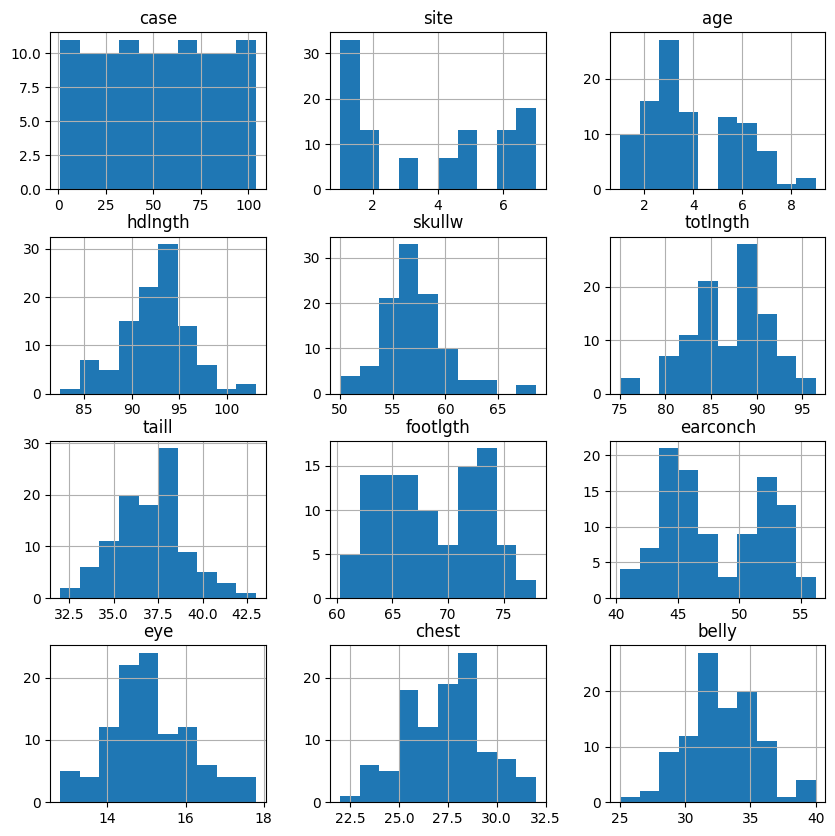

In [20]:
df_possum.hist(figsize=(10, 10))
plt.show()

In [21]:
fill_null(df_possum, 'footlgth', 'normal')
fill_null(df_possum, 'age', 'skewed')

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


##### Nilai duplikat

In [22]:
print("Jumlah nilai duplikat pada df possum")
print(df_possum.duplicated().sum())

Jumlah nilai duplikat pada df possum
0


##### Outlier

In [23]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [24]:
numerical_outlier = df_possum.select_dtypes(include=np.number)
print("Outlier pada df possum")
outliers_train = dict(check_outlier(numerical_outlier).sum())

Outlier pada df possum
Outlier pada tiap atribut:
case        0
site        0
age         2
hdlngth     3
skullw      8
totlngth    0
taill       4
footlgth    0
earconch    0
eye         1
chest       1
belly       3
dtype: int64


##### Encoding fitur kategorikal

In [25]:
for col in df_possum.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_possum[col].value_counts(), '\n')

No. of unique values in column Pop:
Pop
other    58
Vic      46
Name: count, dtype: int64 

No. of unique values in column sex:
sex
m    61
f    43
Name: count, dtype: int64 



In [26]:
pop_mapping = {
    'other': 0,
    'Vic': 1
}

sex_mapping = {
    'm': 0,
    'f': 1
}

# Salin dataset agar tidak mengubah data asli
df_possum_encoded = df_possum.copy()

# Encode kolom menggunakan mapping
df_possum_encoded['Pop'] = df_possum['Pop'].map(pop_mapping)
df_possum_encoded['sex'] = df_possum['sex'].map(sex_mapping)

# Tampilkan hasil encoding
df_possum_encoded.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,1,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,1,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,1,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


##### Split data

In [27]:
y = df_possum_encoded['hdlngth']
X = df_possum_encoded.drop(columns=['hdlngth', 'case'], errors='ignore')  # Hapus 'category' jika ada

In [28]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Standarisasi dataset

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=["number"]).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `hdlngth` sebagai target prediksi. Tampilkan hasil prediksi pada keseluruhan data uji.

In [30]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [31]:
# Menampilkan koefisien dan intersep dari model
print("Koefisien persamaan linear: ", linear.coef_)
print("Intersep persamaan linear: ", linear.intercept_)

Koefisien persamaan linear:  [ 0.26839836 -1.82626486 -0.39051533  0.33492973  0.80201844  1.4714693
 -0.75911082  1.24176105  0.73984012  0.42174593  0.55891287  0.44827523]
Intersep persamaan linear:  92.50481927710844


In [32]:
y_pred_response = linear.predict(X_train)
print('predicted response:', y_pred_response, sep='\n')

predicted response:
[97.71784992 93.59167966 92.20944443 91.00946077 88.82588896 92.77395607
 90.00176006 87.57818334 92.46740635 87.94473812 93.73128798 94.05606084
 86.08792288 91.59864184 88.15028891 93.12803127 91.68942735 95.91413058
 89.60001592 95.38947425 95.36598544 92.86851494 94.27681374 94.43331398
 85.16066322 93.90064769 91.77666902 93.4107567  92.91177594 92.69847416
 97.35739883 88.5544825  93.32222097 95.19229406 95.99175666 94.90585337
 94.33651465 83.60179516 94.52712551 88.50588854 94.08459676 93.67819799
 89.27802262 94.46380694 89.1451656  99.86617954 94.47889796 93.6881561
 92.36703741 89.5067397  92.60627659 89.50795263 90.43526029 86.54110403
 99.97783054 95.51451502 92.07262383 96.69543216 93.57331129 90.42216348
 96.49247251 90.50699878 92.27350083 90.61429245 89.62453355 89.39490552
 94.55505428 94.51041838 94.56448325 96.8164033  93.0652862  92.30382438
 93.24071511 95.30842734 96.6913613  87.40164964 97.25328154 92.57633063
 87.59185758 93.55822069 88.1064

In [33]:
linear.predict(X_test)
pred = linear.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [35]:
regression_metrics(pred, y_test)

MAE: 1.4938582726879925
MSE: 3.3750080256848167
RMSE: 1.8371194914008224
R_squared: 0.5569141503349078


b) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

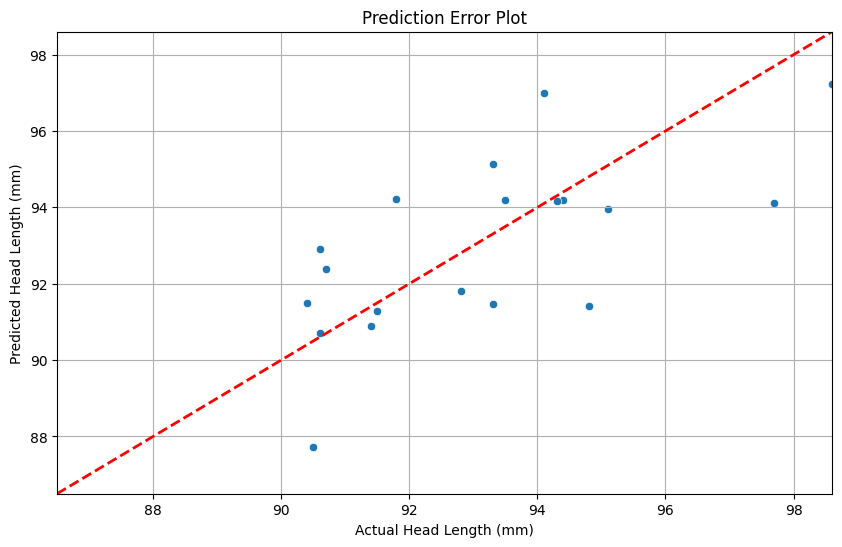

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Prediction Error Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.title('Prediction Error Plot')
plt.xlabel('Actual Head Length (mm)')
plt.ylabel('Predicted Head Length (mm)')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

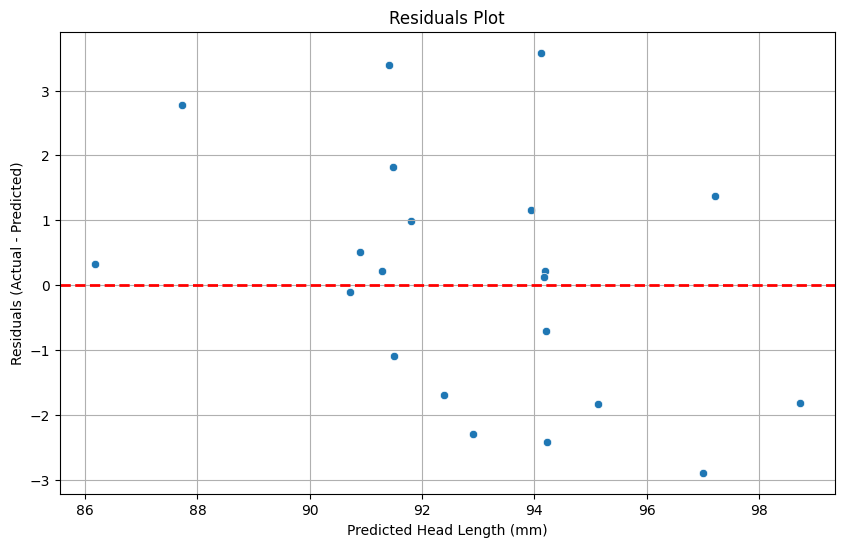

In [37]:
# Calculate residuals
residuals = y_test - pred

# Create a Residuals Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', lw=2)  # Horizontal line at 0
plt.title('Residuals Plot')
plt.xlabel('Predicted Head Length (mm)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()

c) Tampilkan nilai dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

In [38]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [39]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
# Calculate R-squared using cross-validation
r2_scores = cross_val_score(linear, X, y, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("R-squared scores for each fold:", r2_scores)

# Calculate and print the average R-squared score
average_r2 = np.mean(r2_scores)
print("Average R-squared score:", average_r2)

R-squared scores for each fold: [0.55691415 0.71876981 0.80336669 0.65964448 0.37943399]
Average R-squared score: 0.6236258242331134


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [41]:
alpha_list = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [42]:
# Initialize a dictionary to store the models and their corresponding metrics
results = {}

# Loop through each alpha value, fit the Lasso model, and evaluate it
for alpha in alpha_list:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)  # Fit the model on the training data

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Calculate metrics
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, y_pred)

    # Store the results
    results[alpha] = {
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE,
        'R_squared': R_squared
    }

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [43]:
# Display the results for each alpha
for alpha, metrics in results.items():
    print(f"Alpha: {alpha}")
    print(f"MAE: {metrics['MAE']:.4f}\nMSE: {metrics['MSE']:.4f}\nRMSE: {metrics['RMSE']:.4f}\nR-squared: {metrics['R_squared']:.4f}\n")

Alpha: 0.01
MAE: 1.4789
MSE: 3.3624
RMSE: 1.8337
R-squared: 0.5586

Alpha: 0.05
MAE: 1.4364
MSE: 3.4739
RMSE: 1.8638
R-squared: 0.5439

Alpha: 0.1
MAE: 1.4362
MSE: 3.8618
RMSE: 1.9651
R-squared: 0.4930

Alpha: 0.5
MAE: 1.2910
MSE: 3.5921
RMSE: 1.8953
R-squared: 0.5284

Alpha: 1
MAE: 1.3568
MSE: 4.0540
RMSE: 2.0135
R-squared: 0.4678

Alpha: 5
MAE: 2.2517
MSE: 7.8529
RMSE: 2.8023
R-squared: -0.0310

Alpha: 10
MAE: 2.2517
MSE: 7.8529
RMSE: 2.8023
R-squared: -0.0310

Alpha: 50
MAE: 2.2517
MSE: 7.8529
RMSE: 2.8023
R-squared: -0.0310

Alpha: 100
MAE: 2.2517
MSE: 7.8529
RMSE: 2.8023
R-squared: -0.0310



d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [44]:
# Find the alpha with the highest R-squared value
best_alpha = max(results, key=lambda x: results[x]['R_squared'])
best_model_metrics = results[best_alpha]

print(f"Best Alpha: {best_alpha}")
print(f"Best Model Metrics:\nMAE: {best_model_metrics['MAE']:.4f}\nMSE: {best_model_metrics['MSE']:.4f}\nRMSE: {best_model_metrics['RMSE']:.4f}\nR-squared: {best_model_metrics['R_squared']:.4f}")

Best Alpha: 0.01
Best Model Metrics:
MAE: 1.4789
MSE: 3.3624
RMSE: 1.8337
R-squared: 0.5586


e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [45]:
# Fit the best Lasso model on the training data
best_lasso_model = Lasso(alpha=best_alpha)
best_lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [46]:
# Make predictions on the test set
y_pred_best = best_lasso_model.predict(X_test)

In [47]:
# Display the prediction results
print("Predictions from the selected Lasso model on the test data:")
print(y_pred_best)

Predictions from the selected Lasso model on the test data:
[91.92757549 91.47213457 94.17987728 98.7555384  90.91436888 94.06050856
 92.27690509 97.0971332  95.09856797 96.90754385 94.05556649 94.23167438
 93.9180454  91.32729088 86.22261576 91.32419099 92.91919743 90.75102145
 94.04459413 87.82496768 91.47733178]


f) Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

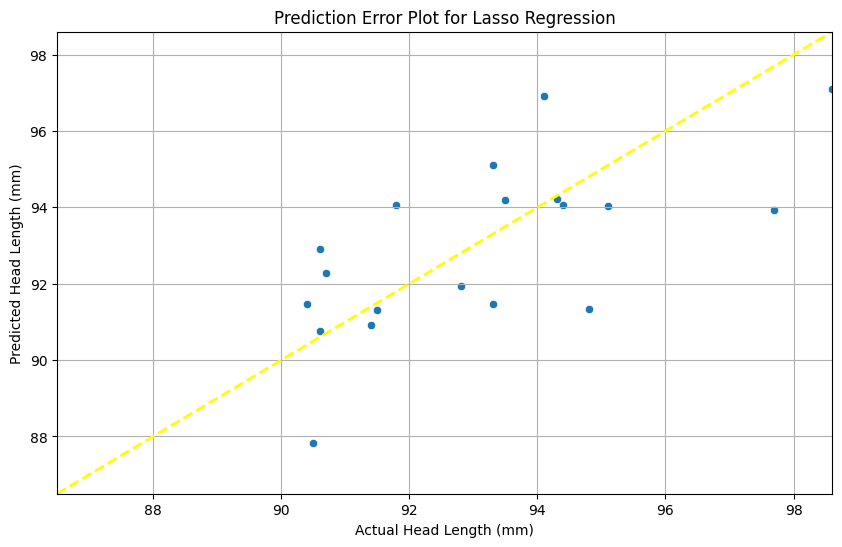

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Prediction Error Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='yellow', linestyle='--', lw=2)  # Diagonal line
plt.title('Prediction Error Plot for Lasso Regression')
plt.xlabel('Actual Head Length (mm)')
plt.ylabel('Predicted Head Length (mm)')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

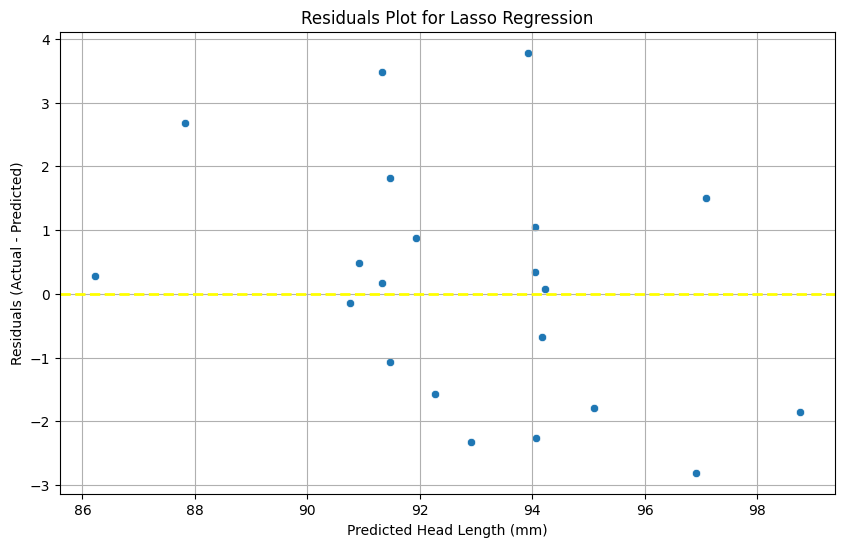

In [49]:
# Calculate residuals
residuals_best = y_test - y_pred_best

# Create a Residuals Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best, y=residuals_best)
plt.axhline(0, color='yellow', linestyle='--', lw=2)  # Horizontal line at 0
plt.title('Residuals Plot for Lasso Regression')
plt.xlabel('Predicted Head Length (mm)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Penjelasan:

Nilai R-squared mengalami penurunan seiring dengan kenaikan nilai alpha. Ketika nilai alpha mengalami kenaikan dari 0.01 sampai 1, nilai R-squared menurun dari 0.5586 sampai menjadi 0.4678. Namun, ketika nilai alpha terlalu besar yaitu dari 5 sampai 100, nilai R-squared menjadi negatif yang menandakan terdapat underfitting yang parah.

Hubungan antara alpha dan R-squared menunjukkan adanya perdagangan antara kompleksitas model dan kinerja. Nilai alpha kecil dapat menghasilkan hasil regresi yang lebih baik dengan memungkinkan model untuk memiliki lebih banyak fleksibilitas, regularisasi minimal, dan dapat menyesuaikan data lebih dekat tetapi berisiko overfitting. Sebaliknya, nilai alpha besar akan mengurangi kompleksitas model menjadi lebih sederhana dan regularisasi memberikan penalti lebih berat pada koefisien yang lebih besar sehingga nilai R-squared menjadi lebih kecil. Namun, jika nilai alpha terlalu besar maka model menjadi terlalu sederhana dan kurang sesuai dengan data sehingga menghasilkan R-squared yang kecil dan bahkan berpotensi negatif.

#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [50]:
alpha_list = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [51]:
# Initialize a dictionary to store the models and their corresponding metrics
results = {}

# Loop through each alpha value, fit the Ridge model, and evaluate it
for alpha in alpha_list:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)  # Fit the model on the training data

    # Make predictions on the test set
    y_pred = ridge_model.predict(X_test)

    # Calculate metrics
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, y_pred)

    # Store the results
    results[alpha] = {
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE,
        'R_squared': R_squared
    }

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [52]:
# Display the results for each alpha
for alpha, metrics in results.items():
    print(f"Alpha: {alpha}")
    print(f"MAE: {metrics['MAE']:.4f}\nMSE: {metrics['MSE']:.4f}\nRMSE: {metrics['RMSE']:.4f}\nR-squared: {metrics['R_squared']}\n")

Alpha: 0.01
MAE: 1.4937
MSE: 3.3750
RMSE: 1.8371
R-squared: 0.5569138680196981

Alpha: 0.05
MAE: 1.4933
MSE: 3.3751
RMSE: 1.8371
R-squared: 0.5569074981173687

Alpha: 0.1
MAE: 1.4928
MSE: 3.3752
RMSE: 1.8372
R-squared: 0.5568881437600548

Alpha: 0.5
MAE: 1.4891
MSE: 3.3793
RMSE: 1.8383
R-squared: 0.5563459359681715

Alpha: 1
MAE: 1.4857
MSE: 3.3899
RMSE: 1.8412
R-squared: 0.5549559888121615

Alpha: 5
MAE: 1.4864
MSE: 3.5318
RMSE: 1.8793
R-squared: 0.5363307090702759

Alpha: 10
MAE: 1.5058
MSE: 3.6822
RMSE: 1.9189
R-squared: 0.5165875592246737

Alpha: 50
MAE: 1.5210
MSE: 3.9234
RMSE: 1.9808
R-squared: 0.4849185580564589

Alpha: 100
MAE: 1.4824
MSE: 3.9041
RMSE: 1.9759
R-squared: 0.48744991184626396



d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [53]:
# Find the alpha with the highest R-squared value
best_alpha = max(results, key=lambda x: results[x]['R_squared'])
best_model_metrics = results[best_alpha]

print(f"Best Alpha: {best_alpha}")
print(f"Best Model Metrics:\nMAE: {best_model_metrics['MAE']:.4f}\nMSE: {best_model_metrics['MSE']:.4f}\nRMSE: {best_model_metrics['RMSE']:.4f}\nR-squared: {best_model_metrics['R_squared']}")

Best Alpha: 0.01
Best Model Metrics:
MAE: 1.4937
MSE: 3.3750
RMSE: 1.8371
R-squared: 0.5569138680196981


e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [54]:
# Fit the best Ridge model on the training data
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [55]:
# Make predictions on the test set
y_pred_best = best_ridge_model.predict(X_test)

In [56]:
# Display the prediction results
print("Predictions from the selected Ridge model on the test data:")
print(y_pred_best)

Predictions from the selected Ridge model on the test data:
[91.81133667 91.49530621 94.20240352 98.72262957 90.88639447 94.22514007
 92.39365229 97.21926005 95.13525402 96.99322478 94.18260621 94.17233307
 94.11521858 91.40994414 86.17516292 91.28744923 92.90237916 90.70966296
 93.94787239 87.72115756 91.48228736]


f) Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

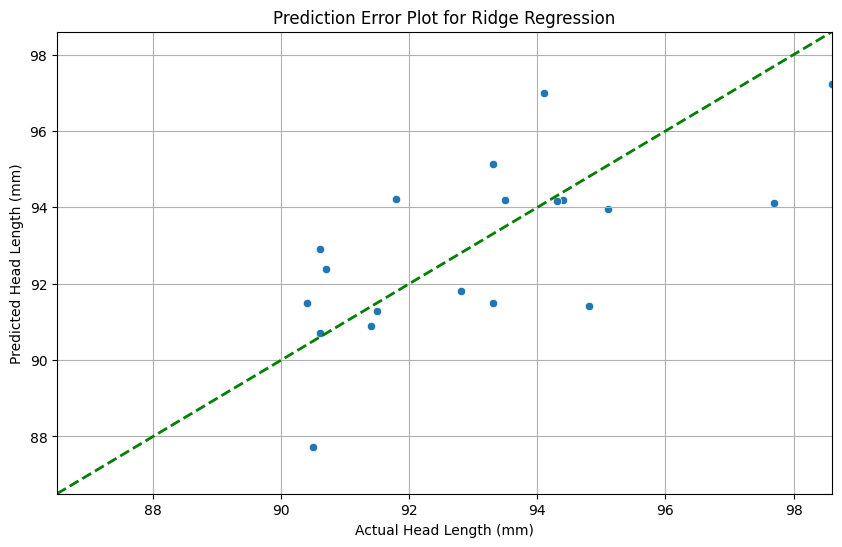

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Prediction Error Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', lw=2)  # Diagonal line
plt.title('Prediction Error Plot for Ridge Regression')
plt.xlabel('Actual Head Length (mm)')
plt.ylabel('Predicted Head Length (mm)')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

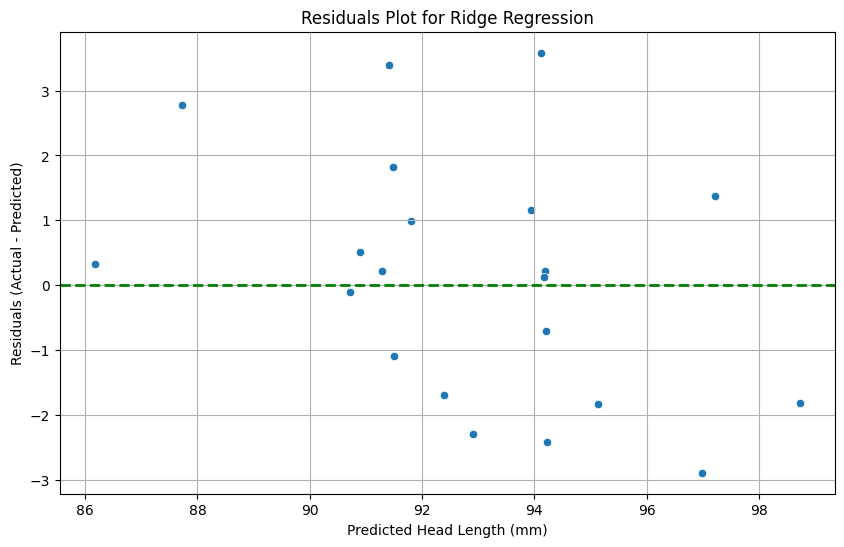

In [58]:
# Calculate residuals
residuals_best = y_test - y_pred_best

# Create a Residuals Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best, y=residuals_best)
plt.axhline(0, color='green', linestyle='--', lw=2)  # Horizontal line at 0
plt.title('Residuals Plot for Ridge Regression')
plt.xlabel('Predicted Head Length (mm)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()

g) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Penjelasan:

Lasso regression dapat digunakan dalam feature selection karena menerapkan L1 regularization penalty yang mengecilkan koefisien yang kurang penting menjadi angka nol, yang secara efektif mengecualikan fitur yang tidak relevan dari model. Sebaliknya, Ridge regression menerapkan L2 regularization yang hanya mengecilkan koefisien ke nol tanpa pernah menghilangkannya sepenuhnya sehingga mempertahankan semua fitur dalam model akhir.

###Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

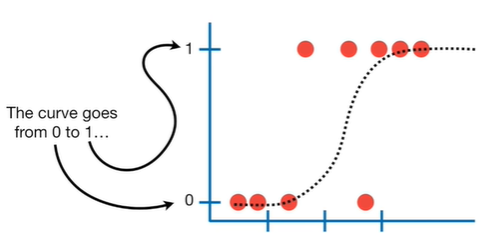

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

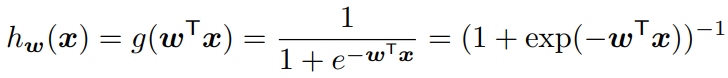

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

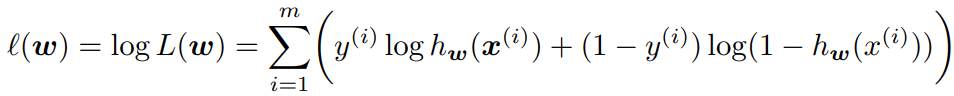

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.

In [59]:
# Membentuk data buatan
x1  = np.array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11])
x2  = np.array([ 2,  3,  4,  7,  7,  8,  9,  6,  5,  9])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  7]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9  6]
 [10  5]
 [11  9]]
y:  [0 0 0 1 1 1 1 0 0 1]


In [60]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [61]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[ 4,  5],
                   [ 4,  5]])
y_test = np.array([0, 1])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [62]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[np.float64(-6.5384871385615275), np.float64(-0.28010415901938157), np.float64(1.3565489526055023)]


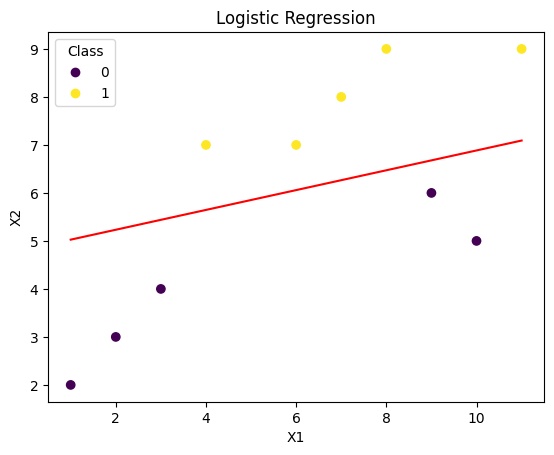

In [63]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [64]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


**Log Odds (Logit)**

Dalam regresi logistik sederhana, kita ingin memodelkan probabilitas suatu kejadian, biasanya dilambangkan dengan Y=1. Namun, probabilitas hanya bisa bernilai antara 0 dan 1, sedangkan model linear (seperti yang digunakan di sisi kanan persamaan regresi logistik) bisa menghasilkan nilai dari negatif tak hingga hingga positif tak hingga. Untuk menjembatani perbedaan ini, kita menggunakan fungsi logit.

Persamaan regresi logistik sederhana adalah:

$$logit[P(Y=1)] = β_0 + β_1 * X + error$$

* **P(Y=1)**: Probabilitas bahwa variabel Y bernilai 1.
* **β₀**: Intersep (konstanta).
* **β₁**: Koefisien slope.
* **X**: Variabel independen.
* **logit[P(Y=1)]**: Log odds dari P(Y=1).

Berikut adalah penjelasan tentang bagaimana koefisien mempengaruhi prediksi:

**1. Intercept (β₀ = -6.5385) Sangat Negatif**

  * Jika $x1$ dan $x2$ kecil (atau nol), nilai logit menjadi sangat negatif.
  * Artinya, probabilitas p mendekati nol, sehingga prediksi cenderung 0 (kejadian negatif).

**2. Koefisien β₁ = -0.2801 (Efek Negatif pada $x1$)**

  * Jika $x1$ meningkat, log-odds menurun.
  * Ini berarti **probabilitas kejadian positif menurun** → lebih mungkin memprediksi **kelas 0**.
  * Dampaknya relatif kecil karena nilai absolutnya tidak besar.

**3. Koefisien β₂ = 1.3565 (Efek Positif pada z2)**

  * Jika $x2$ meningkat, log-odds bertambah.
  * Ini berarti **probabilitas kejadian positif meningkat** → lebih mungkin memprediksi **kelas 1**.
  * Pengaruhnya cukup besar karena nilainya positif dan lebih besar dari β₁.

**Apa itu Odds?**

Odds adalah rasio probabilitas kejadian Y=1 terhadap probabilitas kejadian Y=0. Secara matematis:

$$Odds = \frac{P(Y=1)}{P(Y=0)}$$

Contoh: Jika probabilitas Y=1 adalah 0.8, maka probabilitas Y=0 adalah 1 - 0.8 = 0.2. Odds-nya adalah:

$$Odds = \frac{0.8}{0.2} = 4$$

Ini sering diungkapkan sebagai odds 4:1, yang berarti kejadian Y=1 empat kali lebih mungkin terjadi daripada kejadian Y=0.

**Apa itu Log Odds (Logit)?**

Log odds (logit) adalah logaritma natural (Ln) dari odds. Secara matematis:

$$Log odds = Ln(Odds) = Ln\left(\frac{P(Y=1)}{P(Y=0)}\right) = Ln\left(\frac{P(Y=1)}{1-P(Y=1)}\right)$$

**Mengapa Kita Menggunakan Log Odds?**

* **Transformasi Skala**: Log odds mengubah skala probabilitas (0 hingga 1) menjadi skala yang berkisar dari negatif tak hingga hingga positif tak hingga. Ini memungkinkan kita untuk menggunakan model linear untuk memodelkan probabilitas.
* **Menghubungkan Model Linear dengan Probabilitas**: Logit berfungsi sebagai fungsi penghubung (link function) antara nilai yang dihasilkan oleh sisi kanan model linear dan rentang nilai probabilitas.

**Proses Transformasi Skala:**

1.  **Probabilitas**: Nilai antara 0 dan 1.
2.  **Odds**: Nilai dari 0 hingga positif tak hingga.
3.  **Log Odds (Logit)**: Nilai dari negatif tak hingga hingga positif tak hingga.

Dengan menggunakan log odds, kita dapat memodelkan probabilitas kejadian Y=1 menggunakan model linear, yang memungkinkan kita untuk menganalisis hubungan antara variabel independen X dan probabilitas kejadian tersebut.

Untuk penjelasan lebih detail bisa lihat disini:
* https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html
* https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html
* https://heds.nz/posts/logistic-regression-python/
* https://www.pythonfordatascience.org/logistic-regression-python/

Berikut contoh penggunaan statsmodels untuk membantu kita menganalisis log odds.

In [65]:
import statsmodels.formula.api as smf

# Membentuk DataFrame untuk smf.logit
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y_logistic_train})

# Membuat model logistik menggunakan statsmodels
reg = smf.logit("y ~ x1 + x2", data=df).fit()

# Menampilkan ringkasan model
print(reg.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                   1.000
Time:                        16:39:09   Log-Likelihood:            -6.6247e-11
converged:                      False   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                 0.0009766
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -97.2926   5.04e+05     -0.000      1.000   -9.89e+05    9.89e+05
x1            -8.8473    1.9e+05  -4.66e-05      1.000   -3.72e+0

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packa

Berikut adalah interpretasi dari hasil regresi logistik di atas:

1. **Intercept (β₀ = -97.2926) Sangat Negatif**  
   - Jika \( x1 \) dan \( x2 \) kecil (atau nol), logit menjadi sangat negatif.  
   - Artinya, probabilitas kejadian positif (\( y=1 \)) mendekati nol, sehingga prediksi cenderung ke kelas 0.  

2. **Koefisien \( β₁ = -8.8473 \) (Efek Negatif pada \( x1 \))**  
   - Jika \( x1 \) meningkat, log-odds menurun drastis.  
   - Ini berarti probabilitas kejadian positif menurun → lebih cenderung memprediksi kelas 0.  
   - Namun, nilai ini tidak dapat diinterpretasikan dengan baik karena standard error sangat besar.  

3. **Koefisien \( β₂ = 24.9756 \) (Efek Positif pada \( x2 \))**  
   - Jika \( x2 \) meningkat, log-odds bertambah besar.  
   - Ini berarti probabilitas kejadian positif meningkat → lebih cenderung memprediksi kelas 1.  
   - Namun, adanya separasi sempurna membuat nilai ini tidak dapat diandalkan.

In [66]:
# Menghitung odds ratio dan interval kepercayaan
odds_ratio = np.exp(reg.params)

# Menampilkan odds ratio dan interval kepercayaan
print("\nOdds Ratio:")
print(odds_ratio)


Odds Ratio:
Intercept    5.576218e-43
x1           1.437753e-04
x2           7.026754e+10
dtype: float64


- **$x1$ memiliki dampak negatif yang sangat kuat terhadap peluang kejadian positif.** Jika $x1$ meningkat, kemungkinan $y=1$ akan berkurang drastis.  
- **$x2$ memiliki dampak positif yang sangat besar terhadap peluang kejadian positif.** Jika $x2$ meningkat, kemungkinan $y=1$ akan meningkat sangat signifikan.  
- **Model mengalami separasi sempurna**, karena odds ratio sangat ekstrem ($x1$ sangat kecil, $x2$ sangat besar). Hal ini bisa menyebabkan **overfitting** dan hasil regresi tidak bisa diandalkan untuk prediksi generalisasi. Namun, untuk contoh ini data memang dibuat demikian agar lebih mudah dimengerti.

### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada analisis prediksi penyakit Alzheimer adalah data kesehatan komprehensif dari 2.149 pasien, dengan informasi mendetail mengenai demografi, gaya hidup, riwayat medis, pengukuran klinis, penilaian kognitif dan fungsional, gejala, serta status diagnosis Alzheimer. Dataset ini ideal untuk mengeksplorasi faktor-faktor yang berhubungan dengan Alzheimer, mengembangkan model prediktif, dan melakukan analisis statistik.

**Fitur dalam dataset:**  
1. **PatientID**: Identifikasi unik setiap pasien (4751 hingga 6900).  
2. **Age**: Usia pasien (60 – 90 tahun).  
3. **Gender**: Jenis kelamin pasien, di mana 0 untuk Laki-laki dan 1 untuk Perempuan.  
4. **Ethnicity**: Etnisitas pasien, dengan kode: 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other.  
5. **EducationLevel**: Tingkat pendidikan pasien, dengan kode: 0 = None, 1 = High School, 2 = Bachelor's, 3 = Higher.  
6. **BMI**: Body Mass Index pasien, berkisar antara 15 hingga 40.  
7. **Smoking**: Status merokok, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.  
8. **AlcoholConsumption**: Konsumsi alkohol mingguan dalam unit (0 – 20 unit).  
9. **PhysicalActivity**: Durasi aktivitas fisik mingguan (0 – 10 jam).  
10. **DietQuality**: Skor kualitas diet, berkisar antara 0 hingga 10.  
11. **SleepQuality**: Skor kualitas tidur, berkisar antara 4 hingga 10.  
12. **FamilyHistoryAlzheimers**: Riwayat keluarga dengan Alzheimer, di mana 0 = Tidak dan 1 = Ya.  
13. **CardiovascularDisease**: Keberadaan penyakit kardiovaskular, di mana 0 = Tidak dan 1 = Ya.  
14. **Diabetes**: Keberadaan diabetes, di mana 0 = Tidak dan 1 = Ya.  
15. **Depression**: Keberadaan depresi, di mana 0 = Tidak dan 1 = Ya.  
16. **HeadInjury**: Riwayat cedera kepala, di mana 0 = Tidak dan 1 = Ya.  
17. **Hypertension**: Keberadaan hipertensi, di mana 0 = Tidak dan 1 = Ya.  
18. **SystolicBP**: Tekanan darah sistolik (90 – 180 mmHg).  
19. **DiastolicBP**: Tekanan darah diastolik (60 – 120 mmHg).  
20. **CholesterolTotal**: Kadar kolesterol total (150 – 300 mg/dL).  
21. **CholesterolLDL**: Kadar kolesterol LDL (50 – 200 mg/dL).  
22. **CholesterolHDL**: Kadar kolesterol HDL (20 – 100 mg/dL).  
23. **CholesterolTriglycerides**: Kadar trigliserida (50 – 400 mg/dL).  
24. **MMSE**: Skor Mini-Mental State Examination (0 – 30); skor lebih rendah mengindikasikan gangguan kognitif.  
25. **FunctionalAssessment**: Skor penilaian fungsional (0 – 10); skor lebih rendah menunjukkan penurunan fungsi yang lebih signifikan.  
26. **MemoryComplaints**: Keluhan mengenai ingatan, di mana 0 = Tidak dan 1 = Ya.  
27. **BehavioralProblems**: Gangguan perilaku, di mana 0 = Tidak dan 1 = Ya.  
28. **ADL**: Skor Activities of Daily Living (0 – 10); skor lebih rendah mengindikasikan penurunan kemampuan melakukan aktivitas harian.  
29. **Confusion**: Kondisi bingung, di mana 0 = Tidak dan 1 = Ya.  
30. **Disorientation**: Kondisi tidak terorientasi, di mana 0 = Tidak dan 1 = Ya.  
31. **PersonalityChanges**: Perubahan kepribadian, di mana 0 = Tidak dan 1 = Ya.  
32. **DifficultyCompletingTasks**: Kesulitan dalam menyelesaikan tugas, di mana 0 = Tidak dan 1 = Ya.  
33. **Forgetfulness**: Kondisi sering lupa, di mana 0 = Tidak dan 1 = Ya.  
34. **Diagnosis**: Status diagnosis Alzheimer, di mana 0 menunjukkan tidak ada Alzheimer dan 1 menunjukkan adanya Alzheimer.  
35. **DoctorInCharge**: Informasi rahasia mengenai dokter penanggung jawab (selalu bernilai "XXXConfid" untuk setiap pasien).

**Target variabel:**  
- **Diagnosis**: Status diagnosis Alzheimer (0 = Tidak, 1 = Ya).

**Sumber data dan penjelasan:**  
https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

In [67]:
import pandas as pd

# Import dataset diabetes dan menampilkan 5 row teratas
df_alzheimer = pd.read_csv('alzheimers_disease_data.csv')
df_alzheimer.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [68]:
df_alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

#### Soal 5: Logistic Regression

a) Lakukan drop kolom yang tidak penting pada dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [69]:
df_alzheimer_drop = df_alzheimer.copy()

In [70]:
columns_to_drop = ['PatientID', 'EducationLevel', 'DietQuality', 'CardiovascularDisease', 'Diabetes',
                   'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'DoctorInCharge']
df_alzheimer_drop.drop(columns=columns_to_drop, inplace=True)

In [71]:
y = df_alzheimer_drop['Diagnosis']
X = df_alzheimer_drop.drop(columns=['Diagnosis'], errors='ignore')

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik. Atau bisa coba menggunakan solver lain seperti "saga" atau "liblinear"

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [73]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [74]:
y_pred_logistic = logistic.predict(X_test)

print(y_pred_logistic)

[0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [75]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[249  28]
 [ 45 108]]


In [76]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



In [77]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate the metrics
f1_macro = f1_score(y_test, y_pred_logistic, average='macro')
f1_micro = f1_score(y_test, y_pred_logistic, average='micro')
precision_macro = precision_score(y_test, y_pred_logistic, average='macro')
precision_micro = precision_score(y_test, y_pred_logistic, average='micro')
recall_macro = recall_score(y_test, y_pred_logistic, average='macro')
recall_micro = recall_score(y_test, y_pred_logistic, average='micro')

# Print the metrics
print("F1 Macro Average:", f1_macro)
print("F1 Micro Average:", f1_micro)
print("Precision Macro Average:", precision_macro)
print("Precision Micro Average:", precision_micro)
print("Recall Macro Average:", recall_macro)
print("Recall Micro Average:", recall_micro)

F1 Macro Average: 0.8097794799386737
F1 Micro Average: 0.8302325581395349
Precision Macro Average: 0.8205282112845138
Precision Micro Average: 0.8302325581395349
Recall Macro Average: 0.8023996602251009
Recall Micro Average: 0.8302325581395349


c) Berdasarkan pemahaman Anda mengenai penyakit Alzheimer, fitur-fitur apa saja yang menurut Anda memiliki pengaruh signifikan dalam memprediksi apakah seseorang mengidap Alzheimer? Sebutkan minimal lima fitur dan jelaskan alasan pemilihannya!

In [78]:
significant_feature_alzheimers = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints',
                                  'Confusion', 'Disorientation', 'Forgetfulness']

Penjelasan alasan pemilihan:
*   MMSE (Mini-Mental State Examination) merupakan alat yang banyak digunakan untuk menilai fungsi kognitif. Apabila nilai yang ditunjukkan lebih rendah maka menandakan gangguan kognitif yang lebih parah, yang secara langsung berhubungan dengan penyakit Alzheimer.
*   FunctionalAssessment untuk mengevaluasi kemampuan pasien untuk melakukan aktivitas sehari-hari. Apabila nilai yang ditunjukkan lebih rendah maka menandakan penurunan fungsi yang lebih signifikan, yang sering terlihat pada pasien Alzheimer.
*   MemoryComplaints merupakan masalah memori yang dilaporkan dapat menjadi indikator awal penurunan kognitif dan sering dikaitkan dengan Alzheimer.
*   Confusion atau kebingungan mengacu pada kondisi seseorang mengalami kesulitan memahami lingkungan sekitar, mengenali tempat yang dikenal, atau mengikuti percakapan yang termasuk dalam gejala umum pada penderita penyakit Alzheimer dan tanda awal gangguan kognitif.
*   Disorientation atau disorientasi melibatkan kurangnya kesadaran akan waktu, tempat, atau orang yang dapat menyebabkan peningkatan kecemasan dan kebingungan sehingga menjadi faktor penting dalam menilai tingkat keparahan penurunan kognitif.
*   Forgetfulness atau kelupaan yang sering terjadi termasuk gejala umum penyakit Alzheimer dan dapat berdampak signifikan pada kehidupan sehari-hari.

d) Buatlah masing-masing 1 model regresi logistik menggunakan fitur-fitur yang telah Anda pilih sebelumnya (min. 5 model). Hitung odds ratio untuk setiap fitur tersebut dan berikan interpretasi mengenai bagaimana masing-masing fitur memengaruhi probabilitas seseorang mengidap Alzheimer!
Hint: https://heds.nz/posts/logistic-regression-python/

In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

for feature in significant_feature_alzheimers:
    model = smf.logit(f"Diagnosis ~ {feature}", data=df_alzheimer_drop).fit()
    print(f"\nModel for {feature}:\n", model.summary())

Optimization terminated successfully.
         Current function value: 0.620968
         Iterations 5

Model for MMSE:
                            Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2147
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                 0.04419
Time:                        16:39:11   Log-Likelihood:                -1334.5
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                 1.140e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2441      0.088      2.765      0.006       0.071       0.417
MMSE       

e) Gunakan fitur-fitur yang paling berpengaruh berdasarkan analisis sebelumnya untuk membangun model akhir (1 model gabungan dari semua fitur penting). Pastikan model ini mempertimbangkan kemungkinan faktor confounding dan interaksi antar variabel.

In [80]:
# Membuat model logistik menggunakan statsmodels
reg_alzheimer = smf.logit("Diagnosis ~ MMSE + FunctionalAssessment + MemoryComplaints + Confusion + Disorientation + Forgetfulness", data=df_alzheimer_drop).fit()

# Menampilkan ringkasan model
print(reg_alzheimer.summary())

Optimization terminated successfully.
         Current function value: 0.490637
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2142
Method:                           MLE   Df Model:                            6
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.2448
Time:                        16:39:11   Log-Likelihood:                -1054.4
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                2.168e-144
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7010      0.152     11.218      0.000       1.404       1.998

f) Jelaskan interpretasi Anda terhadap hasil model final yang telah dibuat!

Penjelasan:

Model logistic regression dibuat untuk memprediksi kemungkinan diagnosis penyakit Alzheimer berdasarkan fitur signifikan MMSE, FunctionalAssessment, MemoryComplaints, Confusion, Disorientation, dan Forgetfulness. Model ini mencakup total 2149 observasi, dan nilai log-likelihood sebesar -1054.4, yang menunjukkan kecocokan model.
* **Intercept**: Intercept sebesar 1.7010 menunjukkan log-odds untuk didiagnosis menderita Alzheimer ketika semua variabel prediktor adalah nol.
* **MMSE**: Koefisien untuk MMSE adalah -0.0767, yang menunjukkan bahwa skor MMSE yang lebih tinggi dikaitkan dengan peluang diagnosis Alzheimer yang lebih rendah.
* **FunctionalAssessment**: Koefisien -0.3491 menunjukkan bahwa skor penilaian fungsional yang lebih baik dikaitkan dengan kemungkinan Alzheimer yang lebih rendah.
* **MemoryComplaints**: Koefisien 2.0059 menunjukkan bahwa individu yang melaporkan keluhan memori memiliki kemungkinan yang jauh lebih tinggi untuk didiagnosis dengan Alzheimer.
* **Confusion**: Koefisien untuk kebingungan adalah -0.1834 tetapi tidak signifikan secara statistik (nilai-p = 0.171) sehingga kebingungan mungkin tidak memiliki daya prediksi yang kuat dalam model ini.
* **Disorientation**: Koefisien untuk disorientasi adalah -0.1441, dengan nilai-p sebesar 0.333, yang menunjukkan bahwa hal itu juga tidak signifikan secara statistik dalam memprediksi diagnosis Alzheimer.
* **Forgetfulness**: Koefisien untuk kelupaan adalah 0.0838, tetapi tidak signifikan secara statistik (nilai-p = 0.474) sehingga kelupaan tidak memiliki dampak yang kuat pada kemungkinan didiagnosis dengan Alzheimer dalam model ini.
Karena nilai-p untuk MMSE, FunctionalAssessment, dan MemoryComplaints kurang dari 5 maka menandakan bahwa ketiga fitur tersebut merupakan prediktor diagnosis Alzheimer yang signifikan secara statistik. Sedangkan fitur Confusion, Disorientation, dan Forgetfulness tidak menunjukkan daya prediksi yang signifikan.

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

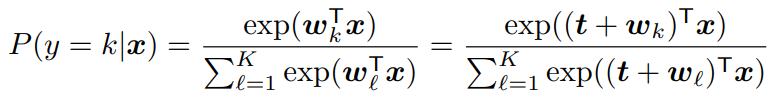

Persamaan likelihood softmaxe regression:

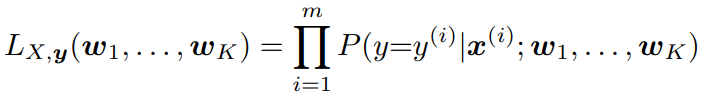

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [81]:
# Membentuk data buatan
x1  = np.array([1, 1, 2, 6, 2, 6, 7, 2, 3, 6])
x2  = np.array([2, 10, 8, 7, 9, 9, 5, 1, 1, 8])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train = np.array([0, 1, 1, 2, 1, 2, 2, 0, 0, 2])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[ 1  2]
 [ 1 10]
 [ 2  8]
 [ 6  7]
 [ 2  9]
 [ 6  9]
 [ 7  5]
 [ 2  1]
 [ 3  1]
 [ 6  8]]
y:  [0 1 1 2 1 2 2 0 0 2]


In [82]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set
softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [83]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan
X_test = np.array([[3, 4], [6, 7]])
y_softmax_test = np.array([0, 2])

y_logistic_predict = softmax.predict(X_test)
print(y_logistic_predict)

[0 2]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [84]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 4.14189026 -0.82066722 -3.32122304] [[-0.23982067 -0.61975393]
 [-0.56153891  0.47452284]
 [ 0.80135958  0.14523109]]


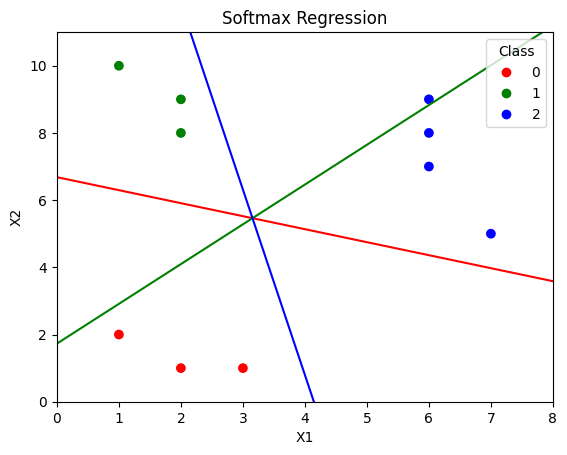

In [85]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

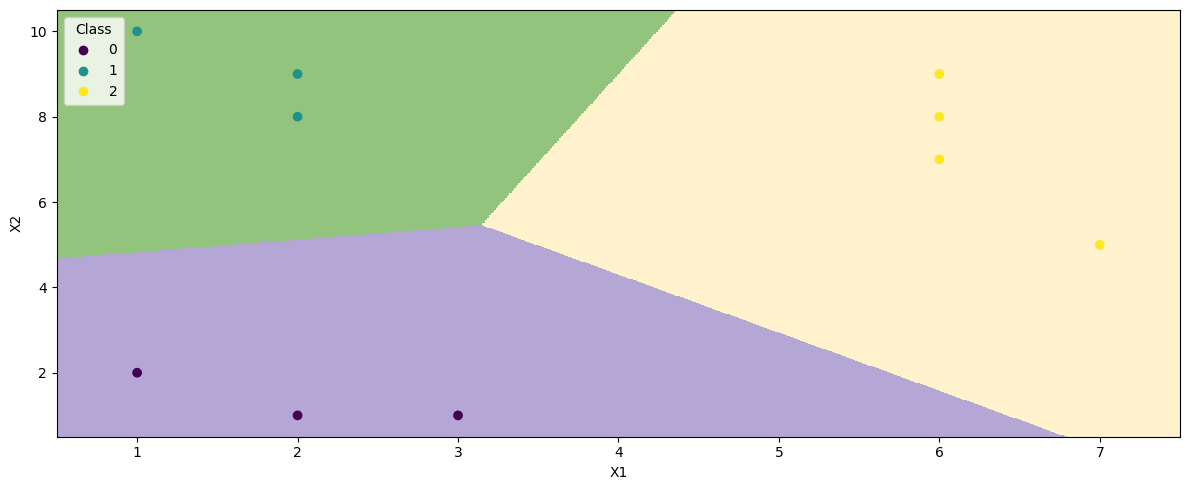

In [86]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [87]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


**Log Odds**

Berikut contoh penggunaan statsmodels untuk membantu kita menganalisis log odds.
https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html

In [88]:
import statsmodels.api as sm

# Data contoh
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y_softmax_train
})

# Membuat model regresi softmax (logistik multinomial)
reg = sm.MNLogit(data['y'], sm.add_constant(data[['x1', 'x2']])).fit()

# Menampilkan ringkasan model
print(reg.summary())


         Current function value: 0.000000
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   10
Model:                        MNLogit   Df Residuals:                        4
Method:                           MLE   Df Model:                            4
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                   1.000
Time:                        16:39:12   Log-Likelihood:            -1.0951e-06
converged:                      False   LL-Null:                       -10.889
Covariance Type:            nonrobust   LLR p-value:                 0.0002219
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.4133   2.06e+06  -2.16e-05      1.000   -4.03e+06    4.03e+06
x1             0.2328   4.64e+05   5.01e-07      1.000    -9.1e+0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Berikut adalah interpretasi dari hasil regresi logistik multinomial di atas:

**Kelas \( y=1 \) dibandingkan dengan \( y=0 \)**
1. **Intercept (β₀ = -44.4133) Sangat Negatif**  
   - Jika \( x1 \) dan \( x2 \) kecil (atau nol), logit menjadi sangat negatif.  
   - Artinya, probabilitas kejadian \( y=1 \) mendekati nol, sehingga prediksi cenderung ke kelas 0.  

2. **Koefisien \( β₁ = 0.2328 \) (Efek Kecil pada \( x1 \))**  
   - Jika \( x1 \) meningkat, log-odds meningkat sedikit.  
   - Ini berarti probabilitas kejadian \( y=1 \) meningkat, tetapi dampaknya sangat kecil.  
   - Standard error yang besar menunjukkan nilai ini **tidak dapat diinterpretasikan dengan baik**.  

3. **Koefisien \( β₂ = 7.7959 \) (Efek Positif pada \( x2 \))**  
   - Jika \( x2 \) meningkat, log-odds bertambah signifikan.  
   - Ini berarti probabilitas kejadian \( y=1 \) meningkat secara drastis.  
   - Namun, standard error yang besar menunjukkan **hasil ini tidak stabil**.  

---

**Kelas \( y=2 \) dibandingkan dengan \( y=0 \)**
1. **Intercept (β₀ = -78.1020) Sangat Negatif**  
   - Jika \( x1 \) dan \( x2 \) kecil (atau nol), probabilitas kejadian \( y=2 \) hampir nol.  
   - Model sangat cenderung memprediksi kelas 0 dalam kondisi ini.  

2. **Koefisien \( β₁ = 9.7740 \) (Efek Positif pada \( x1 \))**  
   - Jika \( x1 \) meningkat, log-odds bertambah signifikan.  
   - Ini berarti probabilitas kejadian \( y=2 \) meningkat cukup drastis.  
   - Namun, standard error yang sangat besar membuat nilai ini **tidak dapat diinterpretasikan dengan baik**.  

3. **Koefisien \( β₂ = 7.8169 \) (Efek Positif pada \( x2 \))**  
   - Jika \( x2 \) meningkat, log-odds meningkat cukup signifikan.  
   - Ini berarti probabilitas kejadian \( y=2 \) meningkat.  
   - Namun, seperti sebelumnya, standard error yang sangat besar menunjukkan **hasil ini tidak stabil**.

In [89]:
# Menghitung odds ratio dan interval kepercayaan
odds_ratio = np.exp(reg.params)

# Menampilkan odds ratio dan interval kepercayaan
print("Odds Ratio:")
print(odds_ratio)

Odds Ratio:
                  0             1
const  5.146777e-20  1.204280e-34
x1     1.262091e+00  1.757156e+04
x2     2.430624e+03  2.482316e+03


**Kelas \( y=1 \) dibandingkan dengan \( y=0 \)**  
1. **Intercept (OR = \( 5.15 \times 10^{-20} \)) → Sangat Kecil**  
   - Jika \( x1 \) dan \( x2 \) bernilai nol, peluang kejadian \( y=1 \) dibandingkan dengan \( y=0 \) **hampir nol**.  
   - Artinya, dalam kondisi dasar (tanpa faktor \( x1 \) dan \( x2 \)), model sangat cenderung memprediksi kelas **\( y=0 \)**.  

2. **Koefisien \( x1 \) (OR = 1.26) → Efek Kecil**  
   - Jika \( x1 \) meningkat **1 unit**, peluang kejadian \( y=1 \) dibandingkan \( y=0 \) naik **26,2%**.  
   - Namun, efeknya relatif kecil dibandingkan dengan \( x2 \).  

3. **Koefisien \( x2 \) (OR = 2,430.62) → Efek Sangat Besar**  
   - Jika \( x2 \) meningkat **1 unit**, peluang kejadian \( y=1 \) dibandingkan \( y=0 \) meningkat sekitar **2,431 kali lipat**.  
   - Ini menunjukkan bahwa **\( x2 \) adalah prediktor utama dalam membedakan kelas \( y=1 \) dari \( y=0 \)**.  

---

**Kelas \( y=2 \) dibandingkan dengan \( y=0 \)**  
1. **Intercept (OR = \( 1.20 \times 10^{-34} \)) → Sangat Kecil**  
   - Jika \( x1 \) dan \( x2 \) bernilai nol, peluang kejadian \( y=2 \) dibandingkan dengan \( y=0 \) **hampir nol**.  
   - Model cenderung sangat sulit memprediksi kelas \( y=2 \) tanpa faktor lainnya.  

2. **Koefisien \( x1 \) (OR = 17,571.56) → Efek Sangat Besar**  
   - Jika \( x1 \) meningkat **1 unit**, peluang kejadian \( y=2 \) dibandingkan \( y=0 \) meningkat **17,571 kali lipat**.  
   - Ini menunjukkan bahwa **\( x1 \) adalah faktor yang sangat berpengaruh dalam membedakan kelas \( y=2 \) dari \( y=0 \)**.  

3. **Koefisien \( x2 \) (OR = 2,482.32) → Efek Sangat Besar**  
   - Jika \( x2 \) meningkat **1 unit**, peluang kejadian \( y=2 \) dibandingkan \( y=0 \) meningkat sekitar **2,482 kali lipat**.  
   - Sama seperti pada \( y=1 \), \( x2 \) sangat mempengaruhi prediksi model.  

---

**Kesimpulan**  
- **\( x2 \) adalah prediktor utama** dalam membedakan kelas \( y=1 \) dan \( y=2 \) dari \( y=0 \).  
- **\( x1 \) memiliki dampak lebih kuat pada \( y=2 \) dibandingkan \( y=1 \)** (OR jauh lebih tinggi di kelas \( y=2 \)).  
- **Intercept yang sangat kecil** menunjukkan model sangat jarang memprediksi kelas selain \( y=0 \) dalam kondisi dasar.  
- **Odds Ratio yang sangat besar dapat mengindikasikan separasi sempurna**, sehingga perlu dilakukan evaluasi lebih lanjut terhadap model.

### Penjelasan Dataset untuk *Softmax Regression*

Dataset ini berisi data dari institusi pendidikan tinggi mengenai berbagai variabel yang berkaitan dengan mahasiswa sarjana, termasuk faktor demografi, sosial-ekonomi, dan kinerja akademik. Data ini digunakan untuk menganalisis dampak berbagai faktor terhadap keberhasilan akademik dan kemungkinan mahasiswa untuk bertahan atau putus kuliah.  

### **Fitur dalam dataset:**  
1. **Marital status**: Status pernikahan mahasiswa. (Kategorikal)  
2. **Application mode**: Metode yang digunakan mahasiswa untuk mendaftar. (Kategorikal)  
3. **Application order**: Urutan aplikasi mahasiswa dalam proses penerimaan. (Numerikal)  
4. **Course**: Program studi yang diambil oleh mahasiswa. (Kategorikal)  
5. **Daytime/evening attendance**: Kategori kehadiran mahasiswa, apakah menghadiri kelas di siang atau malam hari. (Kategorikal)  
6. **Previous qualification**: Kualifikasi pendidikan yang diperoleh mahasiswa sebelum masuk perguruan tinggi. (Kategorikal)  
7. **Nationality**: Kewarganegaraan mahasiswa. (Kategorikal)  
8. **Mother's qualification**: Tingkat pendidikan ibu mahasiswa. (Kategorikal)  
9. **Father's qualification**: Tingkat pendidikan ayah mahasiswa. (Kategorikal)  
10. **Mother's occupation**: Pekerjaan ibu mahasiswa. (Kategorikal)  
11. **Father's occupation**: Pekerjaan ayah mahasiswa. (Kategorikal)  
12. **Displaced**: Status apakah mahasiswa termasuk dalam kelompok yang mengungsi atau berpindah tempat. (Kategorikal)  
13. **Educational special needs**: Apakah mahasiswa memiliki kebutuhan pendidikan khusus. (Kategorikal)  
14. **Debtor**: Status apakah mahasiswa memiliki utang akademik. (Kategorikal)  
15. **Tuition fees up to date**: Status apakah mahasiswa telah membayar biaya kuliah tepat waktu. (Kategorikal)  
16. **Gender**: Jenis kelamin mahasiswa. (Kategorikal)  
17. **Scholarship holder**: Apakah mahasiswa menerima beasiswa. (Kategorikal)  
18. **Age at enrollment**: Usia mahasiswa saat pertama kali mendaftar di institusi pendidikan tinggi. (Numerikal)  
19. **International**: Status apakah mahasiswa merupakan mahasiswa internasional. (Kategorikal)  
20. **Curricular units 1st sem (credited)**: Jumlah mata kuliah yang dikreditkan oleh mahasiswa pada semester pertama. (Numerikal)  
21. **Curricular units 1st sem (enrolled)**: Jumlah mata kuliah yang diambil mahasiswa pada semester pertama. (Numerikal)  
22. **Curricular units 1st sem (evaluations)**: Jumlah mata kuliah yang dievaluasi mahasiswa pada semester pertama. (Numerikal)  
23. **Curricular units 1st sem (approved)**: Jumlah mata kuliah yang diselesaikan dengan sukses oleh mahasiswa pada semester pertama. (Numerikal)  

### **Target Variabel:**  
- **Target**: Status mahasiswa apakah bertahan, lulus, atau drop out dari institusi pendidikan tinggi. ('Dropout', 'Graduate', 'Enrolled')

### **Sumber data dan penjelasan:**  
https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention


In [90]:
import pandas as pd

# Import dataset stars dan menampilkan 5 row teratas
df_students = pd.read_csv('students.csv')

df_students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [91]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [92]:
df_students['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [93]:
# Melakukan encoding pada tiap label
df_students["Target"] = df_students["Target"].map({
    "Dropout": 0,
    "Graduate": 1,
    "Enrolled": 2,
})

df_students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


#### Soal 6: Softmax Regression

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan `random_state=32` untuk splitting data.

In [94]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df_students.drop(columns=['Target'])
y = df_students['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

b) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [95]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for normalization
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

c) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create a softmax regression model
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [97]:
# Make predictions
y_pred = softmax_model.predict(X_test)

In [98]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[221  37  25]
 [ 13 411  22]
 [ 35  67  54]]


In [99]:
# Calculate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       283
           1       0.80      0.92      0.86       446
           2       0.53      0.35      0.42       156

    accuracy                           0.78       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885



In [100]:
# Calculate metrics
from sklearn.metrics import f1_score, precision_score, recall_score

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Print the metrics
print("F1 Macro Average:", f1_macro)
print("F1 Micro Average:", f1_micro)
print("Precision Macro Average:", precision_macro)
print("Precision Micro Average:", precision_micro)
print("Recall Macro Average:", recall_macro)
print("Recall Micro Average:", recall_micro)

F1 Macro Average: 0.6921057005855872
F1 Micro Average: 0.7751412429378531
Precision Macro Average: 0.718091018687894
Precision Micro Average: 0.7751412429378531
Recall Macro Average: 0.6828657459153903
Recall Micro Average: 0.7751412429378531


d) Berikan analisis mengenai perbedaan antara regresi softmax dengan regresi logistik.

Penjelasan:

Logistic Regression digunakan untuk masalah klasifikasi biner yaitu variabel hasil memiliki dua kelas misal 0 dan 1. Model ini memprediksi probabilitas kelas positif menggunakan fungsi logistik.

Softmax Regression atau multinomial logistic regression digunakan untuk masalah klasifikasi multikelas dengan menerapkan fungsi softmax, yang memastikan bahwa probabilitas yang diprediksi berjumlah 1. Model ini menghasilkan distribusi probabilitas di beberapa kelas.

e) Berdasarkan pemahaman Anda mengenai faktor-faktor yang mempengaruhi keberhasilan mahasiswa, fitur-fitur apa saja yang menurut Anda memiliki pengaruh signifikan dalam memprediksi status mahasiswa (Dropout, Graduate, Enrolled)? Sebutkan minimal lima fitur dan jelaskan alasan pemilihannya!

Penjelasan:
* Previous qualification menunjukkan kesiapan siswa untuk pendidikan tinggi
* Tuition fees up to date karena stabilitas keuangan dapat memengaruhi kemampuan siswa untuk melanjutkan pendidikan.
* Scholarship holder karena menerima beasiswa dapat memotivasi siswa untuk berprestasi lebih baik dan mengurangi angka putus sekolah.
* Age at enrollment karena siswa yang lebih muda mungkin memiliki tantangan yang berbeda dibandingkan dengan siswa yang lebih tua, yang memengaruhi kegigihan dan angka kelulusan mereka.
* Debtor karena tekanan finansial dapat sangat memengaruhi kemampuan mahasiswa untuk fokus pada studi mereka. Mahasiswa yang terlilit utang mungkin menghadapi kecemasan dan gangguan terkait situasi finansial mereka, yang dapat menghambat kinerja akademis mereka. Akibatnya, mahasiswa dengan utang akademis mungkin lebih cenderung putus sekolah karena tekanan mengelola keuangan mereka di samping studi mereka. Sebaliknya, mahasiswa tanpa utang mungkin memiliki stabilitas finansial yang lebih baik, yang memungkinkan mereka untuk berkonsentrasi pada pendidikan mereka dan meningkatkan peluang mereka untuk lulus.

f) Buatlah masing-masing 1 model regresi softmax menggunakan fitur-fitur yang telah Anda pilih sebelumnya (min. 5 model). Hitung log-odds dan probabilitas prediksi untuk setiap fitur tersebut dan berikan interpretasi mengenai bagaimana masing-masing fitur memengaruhi probabilitas mahasiswa berada di setiap status (Dropout, Graduate, Enrolled)! Hint: https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html

In [101]:
import statsmodels.api as sm
import pandas as pd

# Rename columns to remove spaces
df_students.columns = df_students.columns.str.replace(' ', '_')

# Now you can use the updated column names in your formula
selected_features = ['Previous_qualification', 'Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment']

# Create a formula for the model
formula = "Target ~ " + " + ".join(selected_features)

# Fit the softmax regression model
model = sm.MNLogit.from_formula(formula, data=df_students).fit()

# Display the summary of the model
print(model.summary())

# Calculate log-odds and predicted probabilities
predicted_probs = model.predict()
log_odds = model.params

# Display log-odds and predicted probabilities
print("\nLog-Odds:\n", log_odds)
print("\nPredicted Probabilities:\n", predicted_probs)

Optimization terminated successfully.
         Current function value: 0.871296
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                 4424
Model:                        MNLogit   Df Residuals:                     4412
Method:                           MLE   Df Model:                           10
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.1457
Time:                        16:39:12   Log-Likelihood:                -3854.6
converged:                       True   LL-Null:                       -4511.8
Covariance Type:            nonrobust   LLR p-value:                2.934e-276
               Target=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.3987      0.239     -5.865      0.000      -1.866   

g) Bangunlah dua model regresi softmax untuk memprediksi status mahasiswa ('Target').
- Model 1: Gunakan semua fitur yang tersedia dalam dataset.
- Model 2: Gunakan fitur-fitur yang paling berpengaruh berdasarkan analisis sebelumnya

Model 1 menggunakan semua fitur

In [102]:
# Rename columns to remove spaces and special characters
df_students.columns = (
    df_students.columns
    .str.replace(' ', '_')  # Replace spaces with underscores
    .str.replace('\'', '')   # Remove single quotes
    .str.replace('(', '')    # Remove opening parentheses
    .str.replace(')', '')    # Remove closing parentheses
    .str.replace('/', '_')    # Replace forward slashes with underscores
)

# Check the updated column names
print(df_students.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Displaced', 'Educational_special_needs',
       'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_

In [103]:
# Create a formula for the model using all features
all_features_formula = "Target ~ " + " + ".join(df_students.columns.difference(['Target']))

# Fit the softmax regression model
model_all_features = sm.MNLogit.from_formula(all_features_formula, data=df_students).fit()

# Display the summary of the model
print(model_all_features.summary())

Optimization terminated successfully.
         Current function value: 0.553934
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                 4424
Model:                        MNLogit   Df Residuals:                     4354
Method:                           MLE   Df Model:                           68
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.4568
Time:                        16:39:12   Log-Likelihood:                -2450.6
converged:                       True   LL-Null:                       -4511.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    Target=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

Model 2 menggunakan fitur yang paling berpengaruh berdasarkan analisis sebelumnya

In [104]:
# Fit the softmax regression model using the updated selected features
model_influential_features = sm.MNLogit.from_formula(formula, data=df_students).fit()

# Display the summary of the model
print(model_influential_features.summary())

Optimization terminated successfully.
         Current function value: 0.871296
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                 4424
Model:                        MNLogit   Df Residuals:                     4412
Method:                           MLE   Df Model:                           10
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.1457
Time:                        16:39:13   Log-Likelihood:                -3854.6
converged:                       True   LL-Null:                       -4511.8
Covariance Type:            nonrobust   LLR p-value:                2.934e-276
               Target=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.3987      0.239     -5.865      0.000      -1.866   

h) Jelaskan interpretasi Anda terhadap 2 model pada soal sebelumnya, bandingkan hasil dari kedua model tersebut!

Penjelasan:

Model 1:

Model ini mencakup semua fitur yang tersedia, yang dapat menangkap berbagai faktor yang memengaruhi status siswa. Koefisien akan menunjukkan bagaimana setiap fitur memengaruhi probabilitas untuk berada di setiap status (Dropout, Graduate, Enrolled). Namun, model mungkin lebih kompleks dan berpotensi overfitting data jika ada banyak fitur dengan daya prediktif yang kecil.

Model 2:

Model ini berfokus pada fitur paling berpengaruh yang diidentifikasi dalam analisis sebelumnya sehingga lebih sederhana. Model ini cenderung lebih dapat diinterpretasikan dan dapat memberikan wawasan yang lebih jelas tentang faktor-faktor yang secara signifikan memengaruhi keberhasilan siswa tanpa gangguan dari fitur yang kurang relevan.

## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan KNN, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
- Join ke kompetisi di bagian bawah ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
- Kerjakan solusi Anda menggunakan notebook ini. Template kode tersedia dibawah.
- Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
- Boleh menggunakan teknik hyperparameter tuning lainnya selain yang diajarkan di kelas/lab.
- Submission File harus sesuai dengan yang dihasilkan oleh model pada Notebook.

**Tautan Kaggle Competition**
- [Kaggle Competition - LAB 6 Regression](https://www.kaggle.com/t/96a47d635616ec19ada1bc969f256957)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 6 ini, kalian **wajib** mengikuti kompetisi Kaggle di atas.

### Kaggle Competition

#### EDA

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv('efficiency_train.csv')
df_train.head()

,id,timestamp,qtr,dept,weekday,group,planned_efficiency,std_min_value,work_in_progress,extra_hours,bonus,downtime,inactive_workers,style_changes,num_workers,real_efficiency
0,520,1/31/2015,Q5,B,Saturday,2,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.971867
1,893,2/23/2015,Q4,A,Monday,11,0.75,11.41,826.0,2820,0,0.0,0,2,58.0,0.750294
2,650,2/7/2015,Q1,A,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
3,1175,3/11/2015,Q2,B,Wednesday,2,0.75,3.90,NaN,1920,0,0.0,0,0,8.0,0.819271
4,403,1/24/2015,Q4,A,Saturday,10,0.75,22.52,1332.0,10080,69,0.0,0,0,56.0,0.800630


In [106]:
total_rows_train, total_features_train = df_train.shape
print("Ukuran data train")
print("Jumlah data: ", total_rows_train)
print("Jumlah fitur: ", total_features_train)

Ukuran data train
Jumlah data:  838
Jumlah fitur:  16


In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  838 non-null    int64  
 1   timestamp           838 non-null    object 
 2   qtr                 838 non-null    object 
 3   dept                838 non-null    object 
 4   weekday             838 non-null    object 
 5   group               838 non-null    int64  
 6   planned_efficiency  838 non-null    float64
 7   std_min_value       838 non-null    float64
 8   work_in_progress    485 non-null    float64
 9   extra_hours         838 non-null    int64  
 10  bonus               838 non-null    int64  
 11  downtime            838 non-null    float64
 12  inactive_workers    838 non-null    int64  
 13  style_changes       838 non-null    int64  
 14  num_workers         838 non-null    float64
 15  real_efficiency     838 non-null    float64
dtypes: float

In [108]:
df_train.describe()

,id,group,planned_efficiency,std_min_value,work_in_progress,extra_hours,bonus,downtime,inactive_workers,style_changes,num_workers,real_efficiency
count,838.000000,838.000000,838.000000,838.000000,485.000000,838.000000,838.000000,838.00000,838.000000,838.000000,838.000000,838.000000
mean,601.299523,6.408115,0.731683,15.191611,1215.896907,4524.743437,38.621718,1.01969,0.414081,0.150358,34.752387,0.737798
std,339.177538,3.442726,0.095141,11.014962,2020.531389,3313.559516,173.869652,15.17943,3.512278,0.438656,22.317597,0.171683
min,0.000000,1.000000,0.350000,2.900000,7.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.233705
25%,312.500000,3.000000,0.700000,3.940000,767.000000,1440.000000,0.000000,0.00000,0.000000,0.000000,9.000000,0.650656
50%,599.500000,6.000000,0.750000,15.260000,1042.000000,3960.000000,11.500000,0.00000,0.000000,0.000000,34.000000,0.779007
75%,891.500000,9.000000,0.800000,24.260000,1267.000000,6900.000000,50.000000,0.00000,0.000000,0.000000,57.000000,0.850137
max,1196.000000,12.000000,0.800000,54.560000,23122.000000,15000.000000,3600.000000,300.00000,45.000000,2.000000,89.000000,1.120437


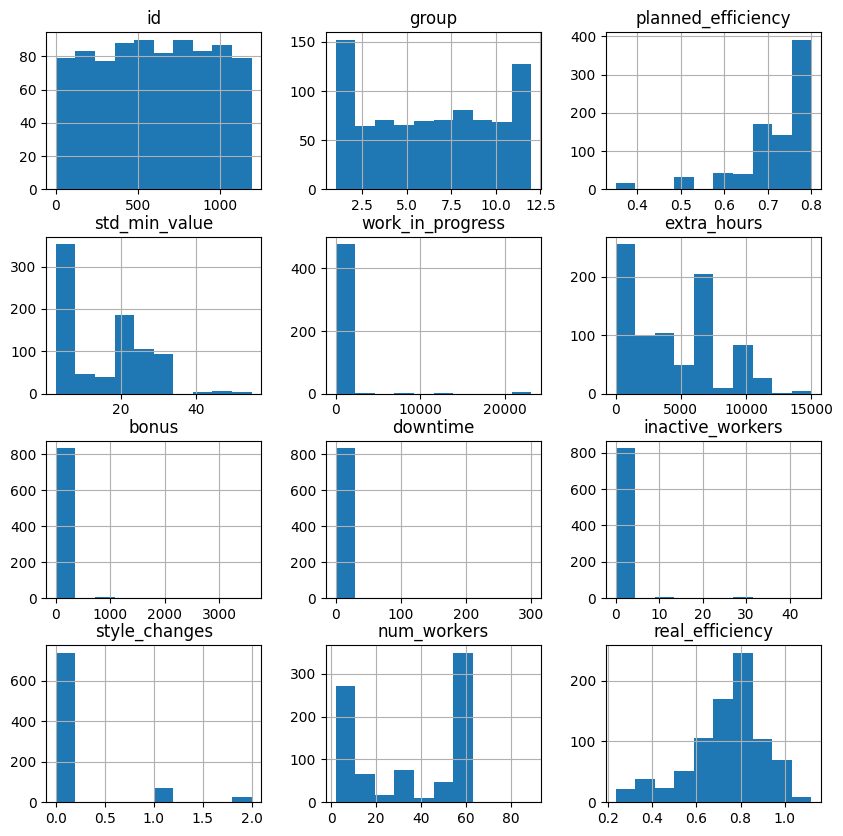

In [109]:
df_train.hist(figsize=(10, 10))
plt.show()

In [110]:
df_test = pd.read_csv('efficiency_test.csv')
df_test.head()

,id,timestamp,qtr,dept,weekday,group,planned_efficiency,std_min_value,work_in_progress,extra_hours,bonus,downtime,inactive_workers,style_changes,num_workers
0,882,2/22/2015,Q4,A,Sunday,5,0.80,30.10,450.0,5700,0,4.5,25,0,60.0
1,557,2/1/2015,Q1,A,Sunday,6,0.65,18.79,881.0,3960,26,0.0,0,0,33.0
2,140,1/8/2015,Q2,A,Thursday,10,0.75,28.08,1066.0,10530,69,0.0,0,0,58.5
3,469,1/27/2015,Q4,B,Tuesday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0
4,490,1/28/2015,Q4,B,Wednesday,4,0.80,4.30,NaN,1440,0,0.0,0,0,12.0


In [111]:
total_rows_test, total_features_test = df_test.shape
print("Ukuran data test")
print("Jumlah data: ", total_rows_test)
print("Jumlah fitur: ", total_features_test)

Ukuran data test
Jumlah data:  359
Jumlah fitur:  15


In [112]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  359 non-null    int64  
 1   timestamp           359 non-null    object 
 2   qtr                 359 non-null    object 
 3   dept                359 non-null    object 
 4   weekday             359 non-null    object 
 5   group               359 non-null    int64  
 6   planned_efficiency  359 non-null    float64
 7   std_min_value       359 non-null    float64
 8   work_in_progress    206 non-null    float64
 9   extra_hours         359 non-null    int64  
 10  bonus               359 non-null    int64  
 11  downtime            359 non-null    float64
 12  inactive_workers    359 non-null    int64  
 13  style_changes       359 non-null    int64  
 14  num_workers         359 non-null    float64
dtypes: float64(5), int64(6), object(4)
memory usage: 42.2+ KB

In [113]:
df_test.describe()

,id,group,planned_efficiency,std_min_value,work_in_progress,extra_hours,bonus,downtime,inactive_workers,style_changes,num_workers
count,359.000000,359.000000,359.000000,359.000000,206.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,590.298050,6.470752,0.724847,14.760028,1130.592233,4667.172702,37.250696,0.054318,0.264624,0.150418,34.277159
std,360.797244,3.517491,0.104009,10.783073,1311.490063,3432.345630,122.634141,0.548464,2.615948,0.402081,21.942546
min,6.000000,1.000000,0.070000,2.900000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,270.500000,3.000000,0.700000,3.940000,801.250000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,588.000000,6.000000,0.750000,14.890000,1026.500000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,914.500000,10.000000,0.800000,23.540000,1194.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,1195.000000,12.000000,0.800000,51.020000,16882.000000,25920.000000,1440.000000,8.000000,35.000000,2.000000,60.000000


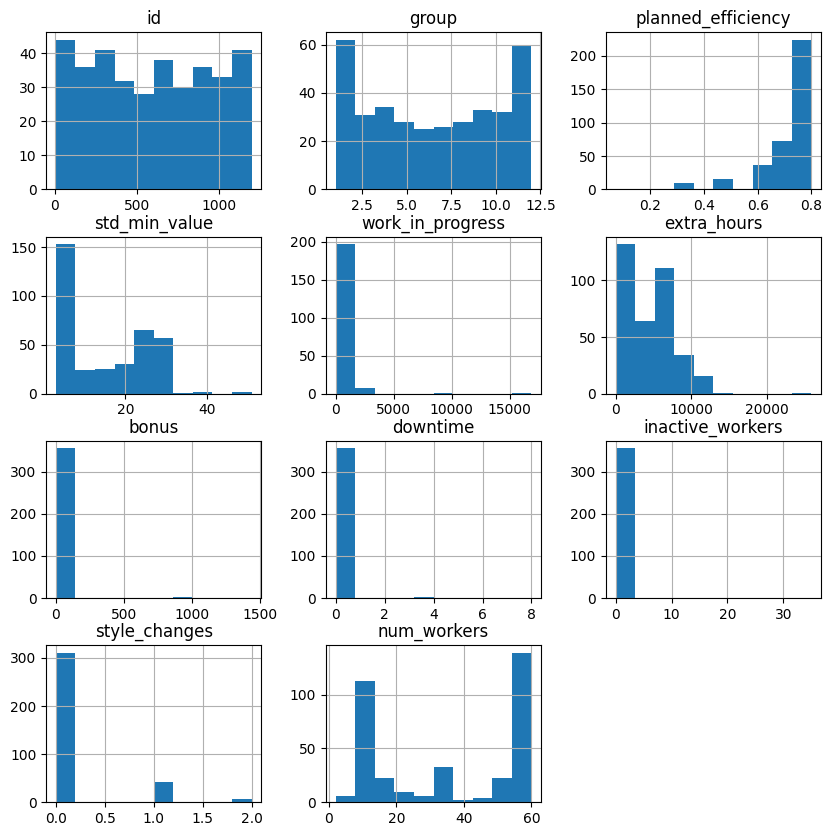

In [114]:
df_test.hist(figsize=(10, 10))
plt.show()

In [115]:
df_sample = pd.read_csv('efficiency_submission_sample.csv')
df_sample.head()

,id,real_efficiency
0,882,0.1
1,557,0.1
2,140,0.1
3,469,0.1
4,490,0.1


In [116]:
total_rows_sample_submission, total_features_sample_submission = df_sample.shape
print("Ukuran data sample submission")
print("Jumlah data: ", total_rows_sample_submission)
print("Jumlah fitur: ", total_features_sample_submission)

Ukuran data sample submission
Jumlah data:  359
Jumlah fitur:  2


In [117]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               359 non-null    int64  
 1   real_efficiency  359 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.7 KB


In [118]:
df_sample.describe()

,id,real_efficiency
count,359.000000,3.590000e+02
mean,590.298050,1.000000e-01
std,360.797244,6.670635e-16
min,6.000000,1.000000e-01
25%,270.500000,1.000000e-01
50%,588.000000,1.000000e-01
75%,914.500000,1.000000e-01
max,1195.000000,1.000000e-01


#### Preprocessing

##### Penanganan missing values

In [119]:
# Lakukan Preprocessing
print("Jumlah nilai null pada data train")
print(df_train.isnull().sum())

Jumlah nilai null pada data train
id                      0
timestamp               0
qtr                     0
dept                    0
weekday                 0
group                   0
planned_efficiency      0
std_min_value           0
work_in_progress      353
extra_hours             0
bonus                   0
downtime                0
inactive_workers        0
style_changes           0
num_workers             0
real_efficiency         0
dtype: int64


In [120]:
# Select only numeric columns
numeric_train = df_train.select_dtypes(include=np.number)

# Calculate skewness for numeric columns
train_skewness = numeric_train.skew()
print("Skewness pada data train")
print(train_skewness)

Skewness pada data train
id                    -0.018927
group                  0.013414
planned_efficiency    -2.016262
std_min_value          0.408919
work_in_progress       9.290520
extra_hours            0.527330
bonus                 16.308447
downtime              17.188093
inactive_workers       9.467333
style_changes          3.015131
num_workers           -0.119295
real_efficiency       -0.827538
dtype: float64


In [121]:
fill_null(df_train, 'work_in_progress', 'skewed')

,id,timestamp,qtr,dept,weekday,group,planned_efficiency,std_min_value,work_in_progress,extra_hours,bonus,downtime,inactive_workers,style_changes,num_workers,real_efficiency
0,520,1/31/2015,Q5,B,Saturday,2,0.80,3.94,1042.0,1200,0,0.0,0,0,10.0,0.971867
1,893,2/23/2015,Q4,A,Monday,11,0.75,11.41,826.0,2820,0,0.0,0,2,58.0,0.750294
2,650,2/7/2015,Q1,A,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
3,1175,3/11/2015,Q2,B,Wednesday,2,0.75,3.90,1042.0,1920,0,0.0,0,0,8.0,0.819271
4,403,1/24/2015,Q4,A,Saturday,10,0.75,22.52,1332.0,10080,69,0.0,0,0,56.0,0.800630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,641,2/7/2015,Q1,B,Saturday,12,0.80,4.08,1042.0,1080,0,0.0,0,0,9.0,0.899111
834,406,1/24/2015,Q4,A,Saturday,12,0.75,15.26,1316.0,6120,40,0.0,0,0,34.0,0.750079
835,455,1/26/2015,Q4,A,Monday,11,0.35,28.08,749.0,10260,23,0.0,0,0,57.0,0.350067
836,867,2/22/2015,Q4,B,Sunday,11,0.60,2.90,1042.0,2880,0,0.0,0,0,12.0,0.805556


In [122]:
print("Jumlah nilai null pada data test")
print(df_test.isnull().sum())

Jumlah nilai null pada data test
id                      0
timestamp               0
qtr                     0
dept                    0
weekday                 0
group                   0
planned_efficiency      0
std_min_value           0
work_in_progress      153
extra_hours             0
bonus                   0
downtime                0
inactive_workers        0
style_changes           0
num_workers             0
dtype: int64


In [123]:
# Select only numeric columns
numeric_test = df_test.select_dtypes(include=np.number)

# Calculate skewness for numeric columns
test_skewness = numeric_test.skew()
print("Skewness pada data test")
print(test_skewness)

Skewness pada data test
id                     0.044285
group                  0.000519
planned_efficiency    -2.353240
std_min_value          0.396907
work_in_progress       9.942032
extra_hours            0.978591
bonus                  8.984467
downtime              11.428688
inactive_workers      10.657995
style_changes          2.707696
num_workers           -0.095240
dtype: float64


In [124]:
fill_null(df_test, 'work_in_progress', 'skewed')

,id,timestamp,qtr,dept,weekday,group,planned_efficiency,std_min_value,work_in_progress,extra_hours,bonus,downtime,inactive_workers,style_changes,num_workers
0,882,2/22/2015,Q4,A,Sunday,5,0.80,30.10,450.0,5700,0,4.5,25,0,60.0
1,557,2/1/2015,Q1,A,Sunday,6,0.65,18.79,881.0,3960,26,0.0,0,0,33.0
2,140,1/8/2015,Q2,A,Thursday,10,0.75,28.08,1066.0,10530,69,0.0,0,0,58.5
3,469,1/27/2015,Q4,B,Tuesday,1,0.75,3.94,1026.5,1200,0,0.0,0,0,10.0
4,490,1/28/2015,Q4,B,Wednesday,4,0.80,4.30,1026.5,1440,0,0.0,0,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,23,1/3/2015,Q1,B,Saturday,1,0.80,3.94,1026.5,960,0,0.0,0,0,8.0
355,1124,3/8/2015,Q2,A,Sunday,5,0.50,26.82,711.0,7080,23,0.0,0,1,59.0
356,1190,3/11/2015,Q2,A,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0
357,349,1/20/2015,Q3,A,Tuesday,12,0.50,15.26,1352.0,3720,23,0.0,0,0,34.0


In [125]:
print("Jumlah nilai null pada data sample")
print(df_sample.isnull().sum())

Jumlah nilai null pada data sample
id                 0
real_efficiency    0
dtype: int64


##### Penanganan nilai duplikat

In [126]:
print("Jumlah nilai duplikat pada data train")
print(df_train.duplicated().sum())

Jumlah nilai duplikat pada data train
0


In [127]:
print("Jumlah nilai duplikat pada data test")
print(df_test.duplicated().sum())

Jumlah nilai duplikat pada data test
0


##### Penanganan outliers

In [128]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

Boxplot data train


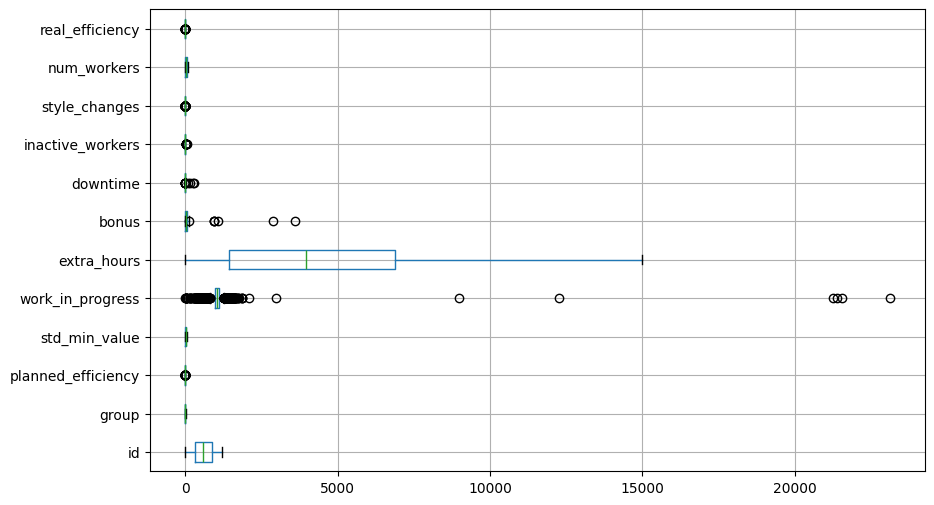

In [129]:
print("Boxplot data train")
plt.figure(figsize=(10, 6))
boxplot = df_train.boxplot(figsize=(12,10), vert=False)
plt.show()

In [130]:
numerical_train = df_train.select_dtypes(include=np.number)
print("Outlier pada data train")
outliers_train = dict(check_outlier(numerical_train).sum())

Outlier pada data train
Outlier pada tiap atribut:
id                      0
group                   0
planned_efficiency     52
std_min_value           0
work_in_progress      261
extra_hours             0
bonus                   7
downtime               14
inactive_workers       14
style_changes          99
num_workers             0
real_efficiency        37
dtype: int64


Boxplot data test


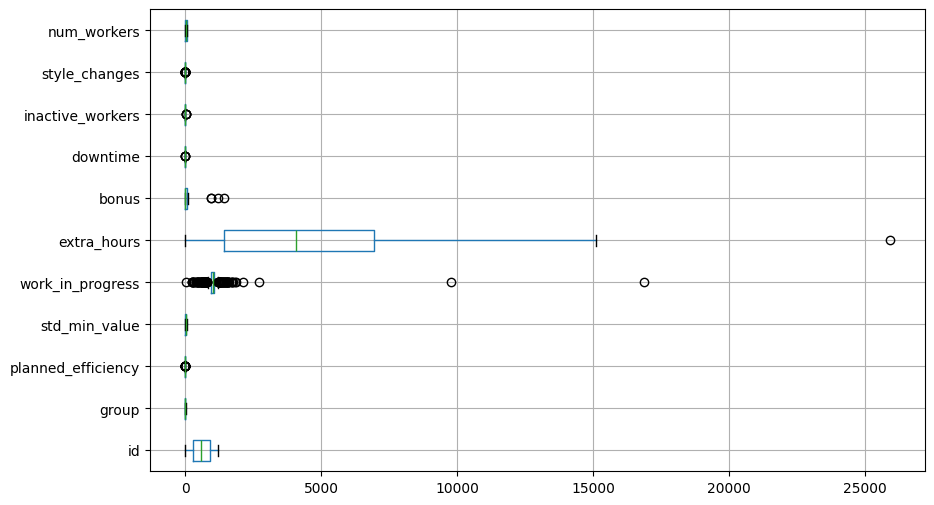

In [131]:
print("Boxplot data test")
plt.figure(figsize=(10, 6))
boxplot = df_test.boxplot(figsize=(12,10), vert=False)
plt.show()

In [132]:
numerical_test = df_test.select_dtypes(include=np.number)
print("Outlier pada data test")
outliers_test = dict(check_outlier(numerical_test).sum())

Outlier pada data test
Outlier pada tiap atribut:
id                      0
group                   0
planned_efficiency     27
std_min_value           0
work_in_progress      104
extra_hours             1
bonus                   4
downtime                4
inactive_workers        4
style_changes          48
num_workers             0
dtype: int64


##### Penanganan encoding fitur kategorikal

In [133]:
for col in df_train.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_train[col].value_counts(), '\n')

No. of unique values in column timestamp:
timestamp
1/24/2015    19
1/13/2015    18
1/5/2015     18
1/10/2015    17
1/29/2015    17
1/22/2015    17
2/19/2015    17
3/8/2015     16
2/1/2015     16
2/28/2015    16
2/3/2015     16
3/2/2015     16
2/8/2015     16
1/14/2015    16
2/16/2015    16
2/26/2015    16
1/28/2015    15
2/12/2015    15
2/15/2015    15
1/7/2015     15
1/31/2015    15
1/17/2015    15
3/1/2015     15
1/26/2015    15
1/11/2015    15
1/4/2015     15
2/23/2015    15
3/4/2015     15
2/4/2015     15
2/14/2015    14
2/2/2015     14
2/11/2015    14
3/10/2015    14
3/9/2015     14
1/12/2015    14
2/18/2015    14
3/11/2015    14
2/25/2015    14
1/8/2015     14
3/3/2015     14
1/25/2015    14
2/10/2015    14
1/18/2015    13
2/7/2015     13
2/22/2015    13
3/7/2015     13
3/5/2015     13
1/21/2015    13
1/27/2015    13
1/1/2015     12
1/3/2015     11
2/17/2015    11
1/6/2015     11
1/19/2015    11
2/24/2015    10
1/20/2015    10
1/15/2015     9
2/5/2015      9
2/9/2015      9
Name

In [134]:
qtr_mapping = {
    'Q1': 1,
    'Q2': 2,
    'Q3': 3,
    'Q4': 4,
    'Q5': 5
}

dept_mapping = {
    'A': 0,
    'B': 1
}

weekday_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

# Salin dataset agar tidak mengubah data asli
df_train_encoded = df_train.copy()

# Encode kolom menggunakan mapping
df_train_encoded['qtr'] = df_train['qtr'].map(qtr_mapping)
df_train_encoded['dept'] = df_train['dept'].map(dept_mapping)
df_train_encoded['weekday'] = df_train['weekday'].map(weekday_mapping)

# Tampilkan hasil encoding
df_train_encoded.head()

,id,timestamp,qtr,dept,weekday,group,planned_efficiency,std_min_value,work_in_progress,extra_hours,bonus,downtime,inactive_workers,style_changes,num_workers,real_efficiency
0,520,1/31/2015,5,1,6,2,0.80,3.94,1042.0,1200,0,0.0,0,0,10.0,0.971867
1,893,2/23/2015,4,0,1,11,0.75,11.41,826.0,2820,0,0.0,0,2,58.0,0.750294
2,650,2/7/2015,1,0,6,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
3,1175,3/11/2015,2,1,3,2,0.75,3.90,1042.0,1920,0,0.0,0,0,8.0,0.819271
4,403,1/24/2015,4,0,6,10,0.75,22.52,1332.0,10080,69,0.0,0,0,56.0,0.800630


In [135]:
# Salin dataset agar tidak mengubah data asli
df_test_encoded = df_test.copy()

# Encode kolom menggunakan mapping
df_test_encoded['qtr'] = df_test['qtr'].map(qtr_mapping)
df_test_encoded['dept'] = df_test['dept'].map(dept_mapping)
df_test_encoded['weekday'] = df_test['weekday'].map(weekday_mapping)

# Tampilkan hasil encoding
df_test_encoded.head()

,id,timestamp,qtr,dept,weekday,group,planned_efficiency,std_min_value,work_in_progress,extra_hours,bonus,downtime,inactive_workers,style_changes,num_workers
0,882,2/22/2015,4,0,0,5,0.80,30.10,450.0,5700,0,4.5,25,0,60.0
1,557,2/1/2015,1,0,0,6,0.65,18.79,881.0,3960,26,0.0,0,0,33.0
2,140,1/8/2015,2,0,4,10,0.75,28.08,1066.0,10530,69,0.0,0,0,58.5
3,469,1/27/2015,4,1,2,1,0.75,3.94,1026.5,1200,0,0.0,0,0,10.0
4,490,1/28/2015,4,1,3,4,0.80,4.30,1026.5,1440,0,0.0,0,0,12.0


#### Modeling

In [136]:
id = df_test['id'].copy()
# Define the features and target variable
X = df_train_encoded.drop(columns=['id', 'real_efficiency', 'timestamp'])  # Drop non-predictive columns
y = df_train_encoded['real_efficiency']

In [137]:
# Fit the model (using Linear Regression as an example)
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [138]:
# Drop non-predictive columns from the test set
X_test = df_test_encoded.drop(columns=['id', 'timestamp'])

In [139]:
# Make predictions
predictions = model.predict(X_test)

In [140]:
# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'id': df_test['id'],
    'real_efficiency': predictions
})

In [141]:
# Simpan hasil submission
submission_df.to_csv("2206819413_submission.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!
